In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

Num GPUs Available:  1
2.7.0


# Load matches and attributes

In [2]:
matches = pd.read_csv("./Match.csv")
team_Atrributes = pd.read_csv("./Team_Atrributes.csv")

## Analyse loaded data

In [3]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,5,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72


In [4]:
team_Atrributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Little,50,Mixed,Organised,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Normal,56,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Little,70,Long,Organised,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Little,52,Mixed,Organised,53,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [5]:
matches.shape

(22467, 23)

In [6]:
team_Atrributes.shape

(1458, 23)

## Check for null values on each column in each array

In [7]:
pd.isnull(team_Atrributes).sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

In [8]:
pd.isnull(matches).sum()

id                  0
country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
B365H               0
B365D               0
B365A               0
BWH                 0
BWD                 0
BWA                 0
IWH                 0
IWD                 0
IWA                 0
LBH                 0
LBD                 0
LBA                 0
dtype: int64

In [9]:
team_Atrributes.sample(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
841,842,1747,9998,2012-02-22 00:00:00,50,Little,50,Mixed,Organised,55,...,46,Normal,Organised,46,Medium,45,Press,47,Normal,Cover
881,882,71,9830,2012-02-22 00:00:00,46,Little,51,Mixed,Organised,52,...,49,Normal,Organised,47,Medium,43,Press,50,Normal,Cover
1321,1322,462,10281,2012-02-22 00:00:00,55,Little,54,Mixed,Organised,58,...,41,Normal,Organised,51,Medium,50,Press,60,Normal,Cover
984,985,111086,8028,2010-02-22 00:00:00,30,Little,45,Mixed,Organised,45,...,70,Lots,Organised,65,Medium,70,Double,60,Normal,Cover
348,349,242,9783,2014-09-19 00:00:00,56,Normal,46,Mixed,Organised,38,...,68,Lots,Organised,45,Medium,50,Press,59,Normal,Cover


# Create dataframes for each betting company

In [10]:
#Load a part of the data to able to do calculations faster
matches = matches.sample(n=5000)

b365_matches = matches.dropna(subset=['B365H', 'B365D', 'B365A'],inplace=False)
b365_matches.drop(['BWH', 'BWD', 'BWA', 
          'IWH', 'IWD', 'IWA',  
          'LBH', 'LBD', 'LBA',
          ], inplace = True, axis = 1)

b365_matches = b365_matches.dropna(inplace=False)

bw_matches = matches.dropna(subset=['BWH', 'BWD', 'BWA'],inplace=False)
bw_matches.drop(['B365H', 'B365D', 'B365A', 
          'IWH', 'IWD', 'IWA',  
          'LBH', 'LBD', 'LBA',
          ], inplace=True, axis = 1)

bw_matches = bw_matches.dropna(inplace=False)

iw_matches = matches.dropna(subset=['IWH', 'IWD', 'IWA'],inplace=False)
iw_matches.drop(['B365H', 'B365D', 'B365A', 
          'BWH', 'BWD', 'BWA',  
          'LBH', 'LBD', 'LBA',
          ], inplace=True, axis = 1)

iw_matches = iw_matches.dropna(inplace=False)

lb_matches = matches.dropna(subset=['LBH', 'LBD', 'LBA'],inplace=False)
lb_matches.drop(['B365H', 'B365D', 'B365A', 
          'BWH', 'BWD', 'BWA',  
          'IWH', 'IWD', 'IWA',
          ], inplace=True, axis = 1)

lb_matches = lb_matches.dropna(inplace=False)

## Create list called bookeeper to store each betting company

In [11]:
bookeeper_list = [b365_matches,bw_matches,iw_matches,lb_matches]

In [12]:
# Create three list for home teams, away teams and bookeeper to create features
for i in range(len(bookeeper_list)):
    home_teams = bookeeper_list[i]['home_team_api_id'].isin(team_Atrributes['team_api_id'].tolist())
    away_teams = bookeeper_list[i]['away_team_api_id'].isin(team_Atrributes['team_api_id'].tolist())
    bookeeper_list[i] = bookeeper_list[i][home_teams & away_teams]

bookeeper_list[0].describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,B365H,B365D,B365A
count,4939.000000,4939.000000,4939.000000,4939.000000,4.939000e+03,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,12072.482284,10736.905446,10736.905446,18.263819,1.208388e+06,10202.177364,10006.976716,1.541000,1.160964,2.592458,3.839123,4.330634
std,7258.907505,7235.792929,7235.792929,10.518622,4.939850e+05,15187.651058,13339.634832,1.290088,1.134980,1.763667,1.099925,3.857293
min,3.000000,1.000000,1.000000,1.000000,4.831310e+05,1773.000000,1773.000000,0.000000,0.000000,1.040000,2.500000,1.000000
25%,5833.500000,4769.000000,4769.000000,9.000000,8.300985e+05,8533.500000,8533.000000,1.000000,0.000000,1.670000,3.300000,2.000000
50%,11567.000000,10257.000000,10257.000000,18.000000,1.217056e+06,8722.000000,9747.000000,1.000000,1.000000,2.100000,3.500000,3.000000
75%,19047.500000,17642.000000,17642.000000,27.000000,1.709929e+06,9905.000000,9905.000000,2.000000,2.000000,2.750000,4.000000,5.000000
max,24555.000000,21518.000000,21518.000000,38.000000,2.216671e+06,274581.000000,274581.000000,10.000000,7.000000,23.000000,15.000000,41.000000


In [13]:
team_Atrributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


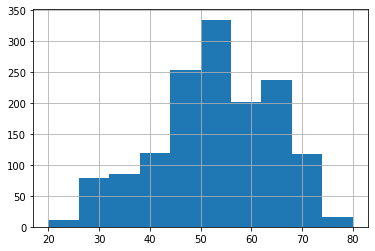

In [14]:
team_Atrributes['buildUpPlaySpeed'].hist();

## Clean up team_Atrributes from unecessary columns

In [15]:
team_Atrributes.drop(['buildUpPlayDribblingClass', 
                      'buildUpPlayPassingClass', 
                      'buildUpPlayPositioningClass',
                      'chanceCreationPassingClass', 
                      'chanceCreationCrossingClass',  
                      'chanceCreationShootingClass',
                      'chanceCreationPositioningClass',
                      'defencePressureClass',
                      'defenceAggressionClass',
                      'defenceTeamWidthClass',
                      'defenceDefenderLineClass'], inplace = True, axis = 1)

team_Atrributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


## Define functions to create new data from Match and Team_attributes

In [16]:
#Gets a label for a given match.
def get_match_outcome(match):
    home_goals = match['home_team_goal']
    away_goals = match['away_team_goal']
     
    outcome = pd.DataFrame()
    outcome.loc[0,'match_api_id'] = match['match_api_id'] 

    #Detect match outcome  
    if home_goals > away_goals:
        outcome.loc[0,'outcome'] = "Home Team Win"
    if home_goals == away_goals:
        outcome.loc[0,'outcome'] = "Draw"
    if home_goals < away_goals:
        outcome.loc[0,'outcome'] = "Away Team Win"
      
    return outcome.loc[0]


#Get last x matches of a team.
def get_last_matches(matches, date, team, x = 10):
    #Filter team matches from matches
    team_matches = matches[(matches['home_team_api_id'] == team) | (matches['away_team_api_id'] == team)]
                           
    #Filter x last matches from team matches
    last_matches = team_matches[team_matches.date < date].sort_values(by = 'date', ascending = False).iloc[0:x,:]
    
    return last_matches
    
    
#Get last team stats of a team.
def get_last_team_stats(team_id, date, team_stats):
    #Filter team stats
    all_team_stats = teams_stats[teams_stats['team_api_id'] == team_id]
           
    #Filter last stats from team
    last_team_stats = all_team_stats[all_team_stats.date < date].sort_values(by='date', ascending=False)
    if last_team_stats.empty:
        last_team_stats = all_team_stats[all_team_stats.date > date].sort_values(by='date', ascending=True)

    return last_team_stats.iloc[0:1,:]


def get_goals(matches, team):
    home_goals = int(matches.home_team_goal[matches.home_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.away_team_api_id == team].sum())

    total_goals = home_goals + away_goals
    
    return total_goals


def get_goals_conceided(matches, team):
    home_goals = int(matches.home_team_goal[matches.away_team_api_id == team].sum())
    away_goals = int(matches.away_team_goal[matches.home_team_api_id == team].sum())

    total_goals = home_goals + away_goals

    return total_goals


#Get number of wins of a specfic team from a set of matches.
def get_wins(matches, team):
    #Find home and away wins
    home_wins = int(matches.home_team_goal[(matches.home_team_api_id == team) & (matches.home_team_goal > matches.away_team_goal)].count())
    away_wins = int(matches.away_team_goal[(matches.away_team_api_id == team) & (matches.away_team_goal > matches.home_team_goal)].count())

    total_wins = home_wins + away_wins

    return total_wins 


#Create match specific features for a given match.
def get_match_features(match, matches, teams_stats, x = 10):
    date = match.date
    home_team = match.home_team_api_id
    away_team = match.away_team_api_id
    
    #Gets home and away team_stats
    home_team_stats = get_last_team_stats(home_team, date, teams_stats);
    away_team_stats = get_last_team_stats(away_team, date, teams_stats);
    
    #Get last x matches of home and away team
    matches_home_team = get_last_matches(matches, date, home_team, x = 5)
    matches_away_team = get_last_matches(matches, date, away_team, x = 5)
    
    #Create goal variables
    home_goals = get_goals(matches_home_team, home_team)
    home_goals_conceided = get_goals_conceided(matches_home_team, home_team)
    away_goals = get_goals(matches_away_team, away_team)
    away_goals_conceided = get_goals_conceided(matches_away_team, away_team)
    
    #Define result data frame
    result = pd.DataFrame()
    
    #Define ID features
    result.loc[0, 'match_api_id'] = match.match_api_id
    result.loc[0, 'league_id'] = match.league_id
    
    #Create match features and team stats
    if(not home_team_stats.empty):
        result.loc[0, 'home_team_buildUpPlaySpeed'] = home_team_stats['buildUpPlaySpeed'].values[0]
        result.loc[0, 'home_team_buildUpPlayPassing'] = home_team_stats['buildUpPlayPassing'].values[0]
        result.loc[0, 'home_team_chanceCreationPassing'] = home_team_stats['chanceCreationPassing'].values[0]
        result.loc[0, 'home_team_chanceCreationCrossing'] = home_team_stats['chanceCreationCrossing'].values[0]
        result.loc[0, 'home_team_chanceCreationShooting'] = home_team_stats['chanceCreationShooting'].values[0]
        result.loc[0, 'home_team_defencePressure'] = home_team_stats['defencePressure'].values[0]
        result.loc[0, 'home_team_defenceAggression'] = home_team_stats['defenceAggression'].values[0]
        result.loc[0, 'home_team_defenceTeamWidth'] = home_team_stats['defenceTeamWidth'].values[0]
    
    if(not away_team_stats.empty):
        result.loc[0, 'away_team_buildUpPlaySpeed'] = away_team_stats['buildUpPlaySpeed'].values[0]
        result.loc[0, 'away_team_buildUpPlayPassing'] = away_team_stats['buildUpPlayPassing'].values[0]
        result.loc[0, 'away_team_chanceCreationPassing'] = away_team_stats['chanceCreationPassing'].values[0]
        result.loc[0, 'away_team_chanceCreationCrossing'] = away_team_stats['chanceCreationCrossing'].values[0]
        result.loc[0, 'away_team_chanceCreationShooting'] = away_team_stats['chanceCreationShooting'].values[0]
        result.loc[0, 'away_team_defencePressure'] = away_team_stats['defencePressure'].values[0]
        result.loc[0, 'away_team_defenceAggression'] = away_team_stats['defenceAggression'].values[0]
        result.loc[0, 'away_team_defenceTeamWidth'] = away_team_stats['defenceTeamWidth'].values[0]
    
    result.loc[0, 'home_team_goals_difference'] = home_goals - home_goals_conceided
    result.loc[0, 'away_team_goals_difference'] = away_goals - away_goals_conceided
    result.loc[0, 'games_won_home_team'] = get_wins(matches_home_team, home_team) 
    result.loc[0, 'games_won_away_team'] = get_wins(matches_away_team, away_team)

    if 'B365H' in matches.columns:
        result.loc[0, 'B365H'] = match.B365H
        result.loc[0, 'B365D'] = match.B365D
        result.loc[0, 'B365A'] = match.B365A
    elif 'BWH' in matches.columns:
        result.loc[0, 'BWH'] = match.BWH
        result.loc[0, 'BWD'] = match.BWD
        result.loc[0, 'BWA'] = match.BWA
    elif 'IWH' in matches.columns:
        result.loc[0, 'IWH'] = match.IWH
        result.loc[0, 'IWD'] = match.IWD
        result.loc[0, 'IWA'] = match.IWA
    elif 'LBH' in matches.columns:
        result.loc[0, 'LBH'] = match.LBH
        result.loc[0, 'LBD'] = match.LBD
        result.loc[0, 'LBA'] = match.LBA
    
    return result.loc[0]

#Create and combine features and labels for all matches
def get_features(matches, teams_stats, x = 10):
    
    #Get match features for all matches
    match_stats = matches.apply(lambda i: get_match_features(i, matches, teams_stats, x = 10), axis = 1)
    
    #Create dummies for league_id feature
    dummies = pd.get_dummies(match_stats['league_id']).rename(columns = lambda x: 'League_' + str(x))
    match_stats = pd.concat([match_stats, dummies], axis = 1)
    match_stats.drop(['league_id'], inplace = True, axis = 1)
    
    #Create match outcomes
    outcomes = matches.apply(get_match_outcome, axis = 1)

    #Merge features, outcomes into one frame
    features = pd.merge(match_stats, outcomes, on = 'match_api_id', how = 'left')
    
    #Drop NA values
    features.dropna(inplace = True)
    
    return features

## Generate features for training

In [17]:
from sklearn.preprocessing import Normalizer

teams_stats = team_Atrributes
viables = [None] * len(bookeeper_list)
inputs = [None] * len(bookeeper_list)
outcomes = [None] * len(bookeeper_list)
features = [None] * len(bookeeper_list)

for i in range(len(bookeeper_list)):
    #Create features and labels based on the provided data
    viables[i] = get_features(bookeeper_list[i], teams_stats, 10)
    inputs[i] = viables[i].drop('match_api_id', axis=1)
    outcomes[i] = inputs[i].loc[:, 'outcome']
    
    features[i] = inputs[i].drop('outcome', axis=1)
    
    #Normalize values
    features[i].iloc[:,:] = Normalizer(norm='l1').fit_transform(features[i])

In [18]:
features

[      home_team_buildUpPlaySpeed  home_team_buildUpPlayPassing  \
 0                       0.084216                      0.060154   
 1                       0.050169                      0.062712   
 2                       0.059594                      0.065934   
 3                       0.083348                      0.043486   
 4                       0.074979                      0.048201   
 ...                          ...                           ...   
 4934                    0.056689                      0.056689   
 4935                    0.063171                      0.063171   
 4936                    0.052411                      0.040764   
 4937                    0.061003                      0.072094   
 4938                    0.068124                      0.062447   
 
       home_team_chanceCreationPassing  home_team_chanceCreationCrossing  \
 0                            0.084216                          0.048123   
 1                            0.066474    

# Define functions to to train models

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score

lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", patience=10, factor=0.3, cooldown=1)
    
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=20,
                                                  restore_best_weights=True,
                                                  mode='min')

def train_nn_model(clf, data, labels):
    #Set up Cross Validation
    cv_folds = KFold(n_splits=10, shuffle=False)
    prediction_folds = []
    
    #Set up training for each fold
    for train, test in cv_folds.split(data):
        X_train, X_test = data[data.index.isin(train)], data[data.index.isin(test)]
        y_train, y_test = labels[data.index.isin(train)], labels[data.index.isin(test)]

        clf.fit(X_train, y_train, epochs=250, batch_size=128, verbose=2, callbacks=[lr_monitor, early_stopping])
        
        prediction_folds.append(clf.predict(X_test))
        
    y_predict = prediction_folds[0]
    
    for i in range(1, 10):
        y_predict = np.append(y_predict, prediction_folds[i], axis=0)
        
    return y_predict


def convert_predictions(clf, data, outcomes):
    #Encoder for transformations
    encoder = LabelEncoder()
    y_outcomes = encoder.fit_transform(outcomes)
    y_outcomes = tf.keras.utils.to_categorical(y_outcomes)
    
    #Get predictions
    y_predict = train_nn_model(clf, data, y_outcomes)
    
    #Normalize values
    y_predict_reverse = [np.argmax(y, axis=None, out=None) for y in y_predict]
    y_predict_decoded = encoder.inverse_transform(y_predict_reverse)
    
    return outcomes, y_predict_decoded


def prediction_metrics(y_test, y_predict):
    #Labels for each result
    display_ls = ['Home Team Win', 'Draw', 'Away Team Win']
    
    #Create confusion matrix to evaluate accuracy
    confusion_m = confusion_matrix(y_test, y_predict, labels= display_ls)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=display_ls)
    disp.plot(include_values=True, values_format='d')
    plt.show()
    
    print(classification_report(y_test, y_predict, target_names=display_ls))
    print("\nAccuracy: ", accuracy_score(y_test, y_predict))
    print("Recall: ", recall_score(y_test, y_predict, average='weighted'))
    print("Precision: ", precision_score(y_test, y_predict, average='weighted', zero_division=1))
    print("\n")
    print("----------------------------------------------------------")

## Linear Neural Network

In [20]:
clf_title = ["B365","BW","IW","LB"]

result_outcomes = [None] * len(features)
result_y_predict_decoded = [None] * len(features)

#Train module with linear Neural Network
for i in range(len(features)):
    col_features = list(features[i].columns.values)
    features_selected = features[i][col_features].copy(deep=True)
    
    visible = tf.keras.layers.Input(shape=(features_selected.shape[1]))
    hidden1 = tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(visible)
    output = tf.keras.layers.Dense(3, activation='softmax')(hidden1)

    clf = tf.keras.Model(inputs=visible, outputs=output)
    print("Predictions for " + clf_title[i])

    clf.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    result_outcomes[i],result_y_predict_decoded[i] = convert_predictions(clf, features_selected, outcomes[i])

Predictions for B365
Epoch 1/250
35/35 - 2s - loss: 1.0794 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 2s/epoch - 45ms/step
Epoch 2/250
35/35 - 0s - loss: 1.0627 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 185ms/epoch - 5ms/step
Epoch 3/250
35/35 - 0s - loss: 1.0617 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 4/250
35/35 - 0s - loss: 1.0609 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 207ms/epoch - 6ms/step
Epoch 5/250
35/35 - 0s - loss: 1.0607 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 220ms/epoch - 6ms/step
Epoch 6/250
35/35 - 0s - loss: 1.0589 - precision: 0.0000e+00 - recall: 0.0000e+00 - lr: 0.0010 - 188ms/epoch - 5ms/step
Epoch 7/250
35/35 - 0s - loss: 1.0580 - precision: 0.8750 - recall: 0.0031 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 8/250
35/35 - 0s - loss: 1.0566 - precision: 0.7826 - recall: 0.0040 - lr: 0.0010 - 212ms/epoch - 6ms/step
Epoch 9/250
35/35 - 0s - loss

Epoch 73/250
35/35 - 0s - loss: 0.9904 - precision: 0.6379 - recall: 0.2632 - lr: 0.0010 - 179ms/epoch - 5ms/step
Epoch 74/250
35/35 - 0s - loss: 0.9909 - precision: 0.6416 - recall: 0.2589 - lr: 0.0010 - 191ms/epoch - 5ms/step
Epoch 75/250
35/35 - 0s - loss: 0.9887 - precision: 0.6378 - recall: 0.2650 - lr: 0.0010 - 186ms/epoch - 5ms/step
Epoch 76/250
35/35 - 0s - loss: 0.9904 - precision: 0.6457 - recall: 0.2583 - lr: 0.0010 - 193ms/epoch - 6ms/step
Epoch 77/250
35/35 - 0s - loss: 0.9889 - precision: 0.6398 - recall: 0.2533 - lr: 0.0010 - 186ms/epoch - 5ms/step
Epoch 78/250
35/35 - 0s - loss: 0.9895 - precision: 0.6361 - recall: 0.2619 - lr: 0.0010 - 194ms/epoch - 6ms/step
Epoch 79/250
35/35 - 0s - loss: 0.9886 - precision: 0.6386 - recall: 0.2648 - lr: 0.0010 - 187ms/epoch - 5ms/step
Epoch 80/250
35/35 - 0s - loss: 0.9884 - precision: 0.6445 - recall: 0.2643 - lr: 0.0010 - 194ms/epoch - 6ms/step
Epoch 81/250
35/35 - 0s - loss: 0.9892 - precision: 0.6409 - recall: 0.2650 - lr: 0.0010

Epoch 145/250
35/35 - 0s - loss: 0.9829 - precision: 0.6386 - recall: 0.2850 - lr: 0.0010 - 191ms/epoch - 5ms/step
Epoch 146/250
35/35 - 0s - loss: 0.9820 - precision: 0.6490 - recall: 0.2700 - lr: 0.0010 - 175ms/epoch - 5ms/step
Epoch 147/250
35/35 - 0s - loss: 0.9807 - precision: 0.6376 - recall: 0.2794 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 148/250
35/35 - 0s - loss: 0.9828 - precision: 0.6343 - recall: 0.2868 - lr: 0.0010 - 175ms/epoch - 5ms/step
Epoch 149/250
35/35 - 0s - loss: 0.9839 - precision: 0.6387 - recall: 0.2787 - lr: 0.0010 - 181ms/epoch - 5ms/step
Epoch 150/250
35/35 - 0s - loss: 0.9806 - precision: 0.6487 - recall: 0.2713 - lr: 0.0010 - 182ms/epoch - 5ms/step
Epoch 151/250
35/35 - 0s - loss: 0.9811 - precision: 0.6409 - recall: 0.2794 - lr: 0.0010 - 181ms/epoch - 5ms/step
Epoch 152/250
35/35 - 0s - loss: 0.9816 - precision: 0.6475 - recall: 0.2706 - lr: 0.0010 - 188ms/epoch - 5ms/step
Epoch 153/250
35/35 - 0s - loss: 0.9804 - precision: 0.6430 - recall: 0.2727 - l

35/35 - 0s - loss: 0.9792 - precision: 0.6464 - recall: 0.2776 - lr: 7.2900e-07 - 179ms/epoch - 5ms/step
Epoch 215/250
35/35 - 0s - loss: 0.9792 - precision: 0.6466 - recall: 0.2774 - lr: 7.2900e-07 - 185ms/epoch - 5ms/step
Epoch 216/250
35/35 - 0s - loss: 0.9792 - precision: 0.6468 - recall: 0.2776 - lr: 7.2900e-07 - 197ms/epoch - 6ms/step
Epoch 217/250
35/35 - 0s - loss: 0.9792 - precision: 0.6466 - recall: 0.2774 - lr: 7.2900e-07 - 173ms/epoch - 5ms/step
Epoch 218/250
35/35 - 0s - loss: 0.9792 - precision: 0.6464 - recall: 0.2776 - lr: 7.2900e-07 - 179ms/epoch - 5ms/step
Epoch 219/250
35/35 - 0s - loss: 0.9792 - precision: 0.6462 - recall: 0.2774 - lr: 7.2900e-07 - 175ms/epoch - 5ms/step
Epoch 220/250
35/35 - 0s - loss: 0.9792 - precision: 0.6464 - recall: 0.2776 - lr: 7.2900e-07 - 182ms/epoch - 5ms/step
Epoch 221/250
35/35 - 0s - loss: 0.9792 - precision: 0.6464 - recall: 0.2776 - lr: 2.1870e-07 - 181ms/epoch - 5ms/step
Epoch 222/250
35/35 - 0s - loss: 0.9792 - precision: 0.6464 - 

Epoch 34/250
35/35 - 0s - loss: 0.9763 - precision: 0.6483 - recall: 0.2783 - lr: 1.5943e-10 - 177ms/epoch - 5ms/step
Epoch 35/250
35/35 - 0s - loss: 0.9763 - precision: 0.6483 - recall: 0.2783 - lr: 1.5943e-10 - 179ms/epoch - 5ms/step
Epoch 36/250
35/35 - 0s - loss: 0.9763 - precision: 0.6483 - recall: 0.2783 - lr: 1.5943e-10 - 188ms/epoch - 5ms/step
Epoch 37/250
35/35 - 0s - loss: 0.9763 - precision: 0.6483 - recall: 0.2783 - lr: 1.5943e-10 - 179ms/epoch - 5ms/step
Epoch 38/250
35/35 - 0s - loss: 0.9763 - precision: 0.6483 - recall: 0.2783 - lr: 1.5943e-10 - 178ms/epoch - 5ms/step
Epoch 1/250
35/35 - 0s - loss: 0.9774 - precision: 0.6493 - recall: 0.2803 - lr: 1.5943e-10 - 210ms/epoch - 6ms/step
Epoch 2/250
35/35 - 0s - loss: 0.9774 - precision: 0.6493 - recall: 0.2803 - lr: 1.5943e-10 - 194ms/epoch - 6ms/step
Epoch 3/250
35/35 - 0s - loss: 0.9774 - precision: 0.6493 - recall: 0.2803 - lr: 1.5943e-10 - 207ms/epoch - 6ms/step
Epoch 4/250
35/35 - 0s - loss: 0.9774 - precision: 0.6493 -

Epoch 1/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 220ms/epoch - 6ms/step
Epoch 2/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 184ms/epoch - 5ms/step
Epoch 3/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 184ms/epoch - 5ms/step
Epoch 4/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 187ms/epoch - 5ms/step
Epoch 5/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 187ms/epoch - 5ms/step
Epoch 6/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 182ms/epoch - 5ms/step
Epoch 7/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 183ms/epoch - 5ms/step
Epoch 8/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - recall: 0.2796 - lr: 3.8742e-13 - 186ms/epoch - 5ms/step
Epoch 9/250
35/35 - 0s - loss: 0.9739 - precision: 0.6549 - reca

Epoch 21/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 9.4143e-16 - 177ms/epoch - 5ms/step
Epoch 22/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 180ms/epoch - 5ms/step
Epoch 23/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 178ms/epoch - 5ms/step
Epoch 24/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 183ms/epoch - 5ms/step
Epoch 25/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 188ms/epoch - 5ms/step
Epoch 26/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 174ms/epoch - 5ms/step
Epoch 27/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 178ms/epoch - 5ms/step
Epoch 28/250
35/35 - 0s - loss: 0.9742 - precision: 0.6496 - recall: 0.2803 - lr: 2.8243e-16 - 177ms/epoch - 5ms/step
Epoch 1/250
35/35 - 0s - loss: 0.9768 - precision: 0.649

Epoch 17/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 6.8630e-19 - 178ms/epoch - 5ms/step
Epoch 18/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 6.8630e-19 - 189ms/epoch - 5ms/step
Epoch 19/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 6.8630e-19 - 175ms/epoch - 5ms/step
Epoch 20/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 6.8630e-19 - 176ms/epoch - 5ms/step
Epoch 21/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 6.8630e-19 - 196ms/epoch - 6ms/step
Epoch 22/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 2.0589e-19 - 180ms/epoch - 5ms/step
Epoch 23/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 2.0589e-19 - 184ms/epoch - 5ms/step
Epoch 24/250
35/35 - 0s - loss: 0.9780 - precision: 0.6447 - recall: 0.2767 - lr: 2.0589e-19 - 200ms/epoch - 6ms/step
Epoch 25/250
35/35 - 0s - loss: 0.9780 - precision: 0.64

Epoch 42/250
35/35 - 0s - loss: 1.0029 - precision_1: 0.6282 - recall_1: 0.2558 - lr: 0.0010 - 174ms/epoch - 5ms/step
Epoch 43/250
35/35 - 0s - loss: 1.0034 - precision_1: 0.6112 - recall_1: 0.2585 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 44/250
35/35 - 0s - loss: 1.0006 - precision_1: 0.6407 - recall_1: 0.2479 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 45/250
35/35 - 0s - loss: 1.0025 - precision_1: 0.6287 - recall_1: 0.2495 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 46/250
35/35 - 0s - loss: 1.0017 - precision_1: 0.6251 - recall_1: 0.2652 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 47/250
35/35 - 0s - loss: 1.0023 - precision_1: 0.6249 - recall_1: 0.2556 - lr: 0.0010 - 174ms/epoch - 5ms/step
Epoch 48/250
35/35 - 0s - loss: 1.0032 - precision_1: 0.6332 - recall_1: 0.2556 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 49/250
35/35 - 0s - loss: 1.0006 - precision_1: 0.6338 - recall_1: 0.2578 - lr: 0.0010 - 183ms/epoch - 5ms/step
Epoch 50/250
35/35 - 0s - loss: 0.9991 - precision_1: 0.

Epoch 112/250
35/35 - 0s - loss: 0.9873 - precision_1: 0.6443 - recall_1: 0.2632 - lr: 0.0010 - 175ms/epoch - 5ms/step
Epoch 113/250
35/35 - 0s - loss: 0.9838 - precision_1: 0.6501 - recall_1: 0.2738 - lr: 0.0010 - 179ms/epoch - 5ms/step
Epoch 114/250
35/35 - 0s - loss: 0.9841 - precision_1: 0.6436 - recall_1: 0.2738 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 115/250
35/35 - 0s - loss: 0.9832 - precision_1: 0.6442 - recall_1: 0.2733 - lr: 0.0010 - 175ms/epoch - 5ms/step
Epoch 116/250
35/35 - 0s - loss: 0.9832 - precision_1: 0.6502 - recall_1: 0.2639 - lr: 0.0010 - 181ms/epoch - 5ms/step
Epoch 117/250
35/35 - 0s - loss: 0.9837 - precision_1: 0.6394 - recall_1: 0.2817 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 118/250
35/35 - 0s - loss: 0.9833 - precision_1: 0.6458 - recall_1: 0.2691 - lr: 0.0010 - 179ms/epoch - 5ms/step
Epoch 119/250
35/35 - 0s - loss: 0.9831 - precision_1: 0.6457 - recall_1: 0.2677 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 120/250
35/35 - 0s - loss: 0.9831 - precis

Epoch 181/250
35/35 - 0s - loss: 0.9801 - precision_1: 0.6508 - recall_1: 0.2821 - lr: 3.0000e-04 - 187ms/epoch - 5ms/step
Epoch 182/250
35/35 - 0s - loss: 0.9793 - precision_1: 0.6440 - recall_1: 0.2837 - lr: 3.0000e-04 - 179ms/epoch - 5ms/step
Epoch 183/250
35/35 - 0s - loss: 0.9800 - precision_1: 0.6505 - recall_1: 0.2747 - lr: 3.0000e-04 - 201ms/epoch - 6ms/step
Epoch 184/250
35/35 - 0s - loss: 0.9800 - precision_1: 0.6518 - recall_1: 0.2792 - lr: 3.0000e-04 - 185ms/epoch - 5ms/step
Epoch 185/250
35/35 - 0s - loss: 0.9796 - precision_1: 0.6489 - recall_1: 0.2790 - lr: 3.0000e-04 - 176ms/epoch - 5ms/step
Epoch 186/250
35/35 - 0s - loss: 0.9800 - precision_1: 0.6460 - recall_1: 0.2796 - lr: 3.0000e-04 - 179ms/epoch - 5ms/step
Epoch 187/250
35/35 - 0s - loss: 0.9794 - precision_1: 0.6431 - recall_1: 0.2882 - lr: 3.0000e-04 - 181ms/epoch - 5ms/step
Epoch 188/250
35/35 - 0s - loss: 0.9797 - precision_1: 0.6466 - recall_1: 0.2774 - lr: 3.0000e-04 - 194ms/epoch - 6ms/step
Epoch 189/250
35

Epoch 51/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 2.1870e-07 - 196ms/epoch - 6ms/step
Epoch 52/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 2.1870e-07 - 187ms/epoch - 5ms/step
Epoch 53/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 2.1870e-07 - 183ms/epoch - 5ms/step
Epoch 54/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 2.1870e-07 - 180ms/epoch - 5ms/step
Epoch 55/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 6.5610e-08 - 190ms/epoch - 5ms/step
Epoch 56/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 6.5610e-08 - 189ms/epoch - 5ms/step
Epoch 57/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 6.5610e-08 - 173ms/epoch - 5ms/step
Epoch 58/250
35/35 - 0s - loss: 0.9762 - precision_1: 0.6526 - recall_1: 0.2823 - lr: 6.5610e-08 - 171ms/epoch - 5ms/step
Epoch 59/250
35/35 - 0s 

Epoch 17/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 1.5943e-10 - 176ms/epoch - 5ms/step
Epoch 18/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 1.5943e-10 - 173ms/epoch - 5ms/step
Epoch 19/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 1.5943e-10 - 176ms/epoch - 5ms/step
Epoch 20/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 1.5943e-10 - 173ms/epoch - 5ms/step
Epoch 21/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 1.5943e-10 - 209ms/epoch - 6ms/step
Epoch 22/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 4.7830e-11 - 173ms/epoch - 5ms/step
Epoch 23/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 4.7830e-11 - 173ms/epoch - 5ms/step
Epoch 24/250
35/35 - 0s - loss: 0.9769 - precision_1: 0.6506 - recall_1: 0.2832 - lr: 4.7830e-11 - 175ms/epoch - 5ms/step
Epoch 25/250
35/35 - 0s 

Epoch 37/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 1.1623e-13 - 181ms/epoch - 5ms/step
Epoch 38/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 1.1623e-13 - 183ms/epoch - 5ms/step
Epoch 39/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 1.1623e-13 - 179ms/epoch - 5ms/step
Epoch 40/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 1.1623e-13 - 178ms/epoch - 5ms/step
Epoch 41/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 1.1623e-13 - 175ms/epoch - 5ms/step
Epoch 42/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 3.4868e-14 - 181ms/epoch - 5ms/step
Epoch 43/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 3.4868e-14 - 174ms/epoch - 5ms/step
Epoch 44/250
35/35 - 0s - loss: 0.9736 - precision_1: 0.6587 - recall_1: 0.2844 - lr: 3.4868e-14 - 175ms/epoch - 5ms/step
Epoch 1/250
35/35 - 0s -

Epoch 5/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 174ms/epoch - 5ms/step
Epoch 6/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 184ms/epoch - 5ms/step
Epoch 7/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 186ms/epoch - 5ms/step
Epoch 8/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 179ms/epoch - 5ms/step
Epoch 9/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 176ms/epoch - 5ms/step
Epoch 10/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 174ms/epoch - 5ms/step
Epoch 11/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 8.4729e-17 - 177ms/epoch - 5ms/step
Epoch 12/250
35/35 - 0s - loss: 0.9767 - precision_1: 0.6496 - recall_1: 0.2819 - lr: 2.5419e-17 - 176ms/epoch - 5ms/step
Epoch 13/250
35/35 - 0s - los

Epoch 4/250
35/35 - 0s - loss: 1.0613 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 5/250
35/35 - 0s - loss: 1.0603 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 6/250
35/35 - 0s - loss: 1.0595 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - lr: 0.0010 - 174ms/epoch - 5ms/step
Epoch 7/250
35/35 - 0s - loss: 1.0584 - precision_2: 1.0000 - recall_2: 2.2497e-04 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 8/250
35/35 - 0s - loss: 1.0569 - precision_2: 1.0000 - recall_2: 2.2497e-04 - lr: 0.0010 - 173ms/epoch - 5ms/step
Epoch 9/250
35/35 - 0s - loss: 1.0554 - precision_2: 0.7419 - recall_2: 0.0052 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 10/250
35/35 - 0s - loss: 1.0536 - precision_2: 0.8049 - recall_2: 0.0074 - lr: 0.0010 - 174ms/epoch - 5ms/step
Epoch 11/250
35/35 - 0s - loss: 1.0519 - precision_2: 0.7190 - recall_2: 0.0391 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 12/250
35/35 - 0s - loss

Epoch 74/250
35/35 - 0s - loss: 0.9957 - precision_2: 0.6343 - recall_2: 0.2583 - lr: 0.0010 - 187ms/epoch - 5ms/step
Epoch 75/250
35/35 - 0s - loss: 0.9939 - precision_2: 0.6404 - recall_2: 0.2632 - lr: 0.0010 - 197ms/epoch - 6ms/step
Epoch 76/250
35/35 - 0s - loss: 0.9938 - precision_2: 0.6372 - recall_2: 0.2549 - lr: 0.0010 - 199ms/epoch - 6ms/step
Epoch 77/250
35/35 - 0s - loss: 0.9950 - precision_2: 0.6378 - recall_2: 0.2556 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 78/250
35/35 - 0s - loss: 0.9943 - precision_2: 0.6377 - recall_2: 0.2661 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 79/250
35/35 - 0s - loss: 0.9976 - precision_2: 0.6335 - recall_2: 0.2664 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 80/250
35/35 - 0s - loss: 0.9930 - precision_2: 0.6439 - recall_2: 0.2603 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 81/250
35/35 - 0s - loss: 0.9934 - precision_2: 0.6424 - recall_2: 0.2623 - lr: 0.0010 - 182ms/epoch - 5ms/step
Epoch 82/250
35/35 - 0s - loss: 0.9931 - precision_2: 0.

Epoch 144/250
35/35 - 0s - loss: 0.9857 - precision_2: 0.6388 - recall_2: 0.2729 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 145/250
35/35 - 0s - loss: 0.9861 - precision_2: 0.6423 - recall_2: 0.2767 - lr: 0.0010 - 174ms/epoch - 5ms/step
Epoch 146/250
35/35 - 0s - loss: 0.9833 - precision_2: 0.6463 - recall_2: 0.2718 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 147/250
35/35 - 0s - loss: 0.9828 - precision_2: 0.6463 - recall_2: 0.2758 - lr: 0.0010 - 183ms/epoch - 5ms/step
Epoch 148/250
35/35 - 0s - loss: 0.9830 - precision_2: 0.6518 - recall_2: 0.2666 - lr: 0.0010 - 182ms/epoch - 5ms/step
Epoch 149/250
35/35 - 0s - loss: 0.9827 - precision_2: 0.6475 - recall_2: 0.2740 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 150/250
35/35 - 0s - loss: 0.9840 - precision_2: 0.6466 - recall_2: 0.2828 - lr: 0.0010 - 181ms/epoch - 5ms/step
Epoch 151/250
35/35 - 0s - loss: 0.9838 - precision_2: 0.6506 - recall_2: 0.2706 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 152/250
35/35 - 0s - loss: 0.9830 - precis

Epoch 212/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6507 - recall_2: 0.2754 - lr: 2.4300e-06 - 319ms/epoch - 9ms/step
Epoch 213/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6507 - recall_2: 0.2754 - lr: 2.4300e-06 - 229ms/epoch - 7ms/step
Epoch 214/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6504 - recall_2: 0.2754 - lr: 2.4300e-06 - 212ms/epoch - 6ms/step
Epoch 215/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6507 - recall_2: 0.2754 - lr: 2.4300e-06 - 225ms/epoch - 6ms/step
Epoch 216/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6497 - recall_2: 0.2749 - lr: 2.4300e-06 - 195ms/epoch - 6ms/step
Epoch 217/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6500 - recall_2: 0.2749 - lr: 2.4300e-06 - 168ms/epoch - 5ms/step
Epoch 218/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6502 - recall_2: 0.2751 - lr: 2.4300e-06 - 199ms/epoch - 6ms/step
Epoch 219/250
35/35 - 0s - loss: 0.9811 - precision_2: 0.6504 - recall_2: 0.2754 - lr: 2.4300e-06 - 171ms/epoch - 5ms/step
Epoch 220/250
35

Epoch 29/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 1.7715e-09 - 178ms/epoch - 5ms/step
Epoch 30/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 1.7715e-09 - 176ms/epoch - 5ms/step
Epoch 31/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 1.7715e-09 - 183ms/epoch - 5ms/step
Epoch 32/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 5.3144e-10 - 213ms/epoch - 6ms/step
Epoch 33/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 5.3144e-10 - 190ms/epoch - 5ms/step
Epoch 34/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 5.3144e-10 - 180ms/epoch - 5ms/step
Epoch 35/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 5.3144e-10 - 197ms/epoch - 6ms/step
Epoch 36/250
35/35 - 0s - loss: 0.9783 - precision_2: 0.6523 - recall_2: 0.2765 - lr: 5.3144e-10 - 211ms/epoch - 6ms/step
Epoch 37/250
35/35 - 0s 

Epoch 1/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 187ms/epoch - 5ms/step
Epoch 2/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 180ms/epoch - 5ms/step
Epoch 3/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 184ms/epoch - 5ms/step
Epoch 4/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 203ms/epoch - 6ms/step
Epoch 5/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 184ms/epoch - 5ms/step
Epoch 6/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 188ms/epoch - 5ms/step
Epoch 7/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 184ms/epoch - 5ms/step
Epoch 8/250
35/35 - 0s - loss: 0.9752 - precision_2: 0.6596 - recall_2: 0.2794 - lr: 3.8742e-13 - 207ms/epoch - 6ms/step
Epoch 9/250
35/35 - 0s - loss: 0

Epoch 16/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 2.8243e-16 - 179ms/epoch - 5ms/step
Epoch 17/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 2.8243e-16 - 173ms/epoch - 5ms/step
Epoch 18/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 2.8243e-16 - 174ms/epoch - 5ms/step
Epoch 19/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 2.8243e-16 - 170ms/epoch - 5ms/step
Epoch 20/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 2.8243e-16 - 178ms/epoch - 5ms/step
Epoch 21/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 2.8243e-16 - 173ms/epoch - 5ms/step
Epoch 22/250
35/35 - 0s - loss: 0.9760 - precision_2: 0.6544 - recall_2: 0.2794 - lr: 8.4729e-17 - 178ms/epoch - 5ms/step
Epoch 1/250
35/35 - 0s - loss: 0.9784 - precision_2: 0.6521 - recall_2: 0.2787 - lr: 8.4729e-17 - 184ms/epoch - 5ms/step
Epoch 2/250
35/35 - 0s - 

Epoch 34/250
35/35 - 0s - loss: 0.9765 - precision_2: 0.6529 - recall_2: 0.2805 - lr: 2.0589e-19 - 178ms/epoch - 5ms/step
Epoch 35/250
35/35 - 0s - loss: 0.9765 - precision_2: 0.6529 - recall_2: 0.2805 - lr: 2.0589e-19 - 181ms/epoch - 5ms/step
Epoch 36/250
35/35 - 0s - loss: 0.9765 - precision_2: 0.6529 - recall_2: 0.2805 - lr: 2.0589e-19 - 173ms/epoch - 5ms/step
Epoch 1/250
35/35 - 0s - loss: 0.9791 - precision_2: 0.6509 - recall_2: 0.2780 - lr: 2.0589e-19 - 196ms/epoch - 6ms/step
Epoch 2/250
35/35 - 0s - loss: 0.9791 - precision_2: 0.6509 - recall_2: 0.2780 - lr: 2.0589e-19 - 183ms/epoch - 5ms/step
Epoch 3/250
35/35 - 0s - loss: 0.9791 - precision_2: 0.6509 - recall_2: 0.2780 - lr: 2.0589e-19 - 174ms/epoch - 5ms/step
Epoch 4/250
35/35 - 0s - loss: 0.9791 - precision_2: 0.6509 - recall_2: 0.2780 - lr: 2.0589e-19 - 178ms/epoch - 5ms/step
Epoch 5/250
35/35 - 0s - loss: 0.9791 - precision_2: 0.6509 - recall_2: 0.2780 - lr: 2.0589e-19 - 172ms/epoch - 5ms/step
Epoch 6/250
35/35 - 0s - loss

Epoch 37/250
35/35 - 0s - loss: 1.0047 - precision_3: 0.6224 - recall_3: 0.2517 - lr: 0.0010 - 182ms/epoch - 5ms/step
Epoch 38/250
35/35 - 0s - loss: 1.0047 - precision_3: 0.6177 - recall_3: 0.2468 - lr: 0.0010 - 181ms/epoch - 5ms/step
Epoch 39/250
35/35 - 0s - loss: 1.0051 - precision_3: 0.6203 - recall_3: 0.2430 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 40/250
35/35 - 0s - loss: 1.0031 - precision_3: 0.6418 - recall_3: 0.2418 - lr: 0.0010 - 182ms/epoch - 5ms/step
Epoch 41/250
35/35 - 0s - loss: 1.0026 - precision_3: 0.6322 - recall_3: 0.2603 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 42/250
35/35 - 0s - loss: 1.0020 - precision_3: 0.6345 - recall_3: 0.2468 - lr: 0.0010 - 187ms/epoch - 5ms/step
Epoch 43/250
35/35 - 0s - loss: 1.0009 - precision_3: 0.6381 - recall_3: 0.2511 - lr: 0.0010 - 188ms/epoch - 5ms/step
Epoch 44/250
35/35 - 0s - loss: 1.0003 - precision_3: 0.6424 - recall_3: 0.2526 - lr: 0.0010 - 178ms/epoch - 5ms/step
Epoch 45/250
35/35 - 0s - loss: 1.0019 - precision_3: 0.

Epoch 107/250
35/35 - 0s - loss: 0.9850 - precision_3: 0.6555 - recall_3: 0.2632 - lr: 0.0010 - 187ms/epoch - 5ms/step
Epoch 108/250
35/35 - 0s - loss: 0.9836 - precision_3: 0.6453 - recall_3: 0.2742 - lr: 0.0010 - 186ms/epoch - 5ms/step
Epoch 109/250
35/35 - 0s - loss: 0.9845 - precision_3: 0.6507 - recall_3: 0.2565 - lr: 0.0010 - 184ms/epoch - 5ms/step
Epoch 110/250
35/35 - 0s - loss: 0.9855 - precision_3: 0.6417 - recall_3: 0.2776 - lr: 0.0010 - 177ms/epoch - 5ms/step
Epoch 111/250
35/35 - 0s - loss: 0.9831 - precision_3: 0.6504 - recall_3: 0.2733 - lr: 0.0010 - 180ms/epoch - 5ms/step
Epoch 112/250
35/35 - 0s - loss: 0.9862 - precision_3: 0.6447 - recall_3: 0.2691 - lr: 0.0010 - 186ms/epoch - 5ms/step
Epoch 113/250
35/35 - 0s - loss: 0.9842 - precision_3: 0.6520 - recall_3: 0.2605 - lr: 0.0010 - 176ms/epoch - 5ms/step
Epoch 114/250
35/35 - 0s - loss: 0.9831 - precision_3: 0.6418 - recall_3: 0.2821 - lr: 0.0010 - 188ms/epoch - 5ms/step
Epoch 115/250
35/35 - 0s - loss: 0.9848 - precis

Epoch 175/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6536 - recall_3: 0.2785 - lr: 9.0000e-05 - 177ms/epoch - 5ms/step
Epoch 176/250
35/35 - 0s - loss: 0.9799 - precision_3: 0.6553 - recall_3: 0.2715 - lr: 9.0000e-05 - 181ms/epoch - 5ms/step
Epoch 177/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6515 - recall_3: 0.2796 - lr: 2.7000e-05 - 180ms/epoch - 5ms/step
Epoch 178/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6526 - recall_3: 0.2756 - lr: 2.7000e-05 - 176ms/epoch - 5ms/step
Epoch 179/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6529 - recall_3: 0.2742 - lr: 2.7000e-05 - 178ms/epoch - 5ms/step
Epoch 180/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6530 - recall_3: 0.2765 - lr: 2.7000e-05 - 177ms/epoch - 5ms/step
Epoch 181/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6516 - recall_3: 0.2731 - lr: 2.7000e-05 - 180ms/epoch - 5ms/step
Epoch 182/250
35/35 - 0s - loss: 0.9797 - precision_3: 0.6534 - recall_3: 0.2765 - lr: 2.7000e-05 - 178ms/epoch - 5ms/step
Epoch 183/250
35

Epoch 242/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 1.9683e-08 - 182ms/epoch - 5ms/step
Epoch 243/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 1.9683e-08 - 177ms/epoch - 5ms/step
Epoch 244/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 1.9683e-08 - 178ms/epoch - 5ms/step
Epoch 245/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 1.9683e-08 - 196ms/epoch - 6ms/step
Epoch 246/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 1.9683e-08 - 187ms/epoch - 5ms/step
Epoch 247/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 1.9683e-08 - 185ms/epoch - 5ms/step
Epoch 248/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 5.9049e-09 - 175ms/epoch - 5ms/step
Epoch 249/250
35/35 - 0s - loss: 0.9796 - precision_3: 0.6528 - recall_3: 0.2745 - lr: 5.9049e-09 - 174ms/epoch - 5ms/step
Epoch 250/250
35

Epoch 13/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 177ms/epoch - 5ms/step
Epoch 14/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 182ms/epoch - 5ms/step
Epoch 15/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 176ms/epoch - 5ms/step
Epoch 16/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 176ms/epoch - 5ms/step
Epoch 17/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 172ms/epoch - 5ms/step
Epoch 18/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 175ms/epoch - 5ms/step
Epoch 19/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 174ms/epoch - 5ms/step
Epoch 20/250
35/35 - 0s - loss: 0.9762 - precision_3: 0.6550 - recall_3: 0.2767 - lr: 1.4349e-11 - 175ms/epoch - 5ms/step
Epoch 21/250
35/35 - 0s 

Epoch 20/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 3.4868e-14 - 173ms/epoch - 5ms/step
Epoch 21/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 3.4868e-14 - 174ms/epoch - 5ms/step
Epoch 22/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 1.0460e-14 - 174ms/epoch - 5ms/step
Epoch 23/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 1.0460e-14 - 179ms/epoch - 5ms/step
Epoch 24/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 1.0460e-14 - 187ms/epoch - 5ms/step
Epoch 25/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 1.0460e-14 - 175ms/epoch - 5ms/step
Epoch 26/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 1.0460e-14 - 182ms/epoch - 5ms/step
Epoch 27/250
35/35 - 0s - loss: 0.9789 - precision_3: 0.6527 - recall_3: 0.2760 - lr: 1.0460e-14 - 177ms/epoch - 5ms/step
Epoch 28/250
35/35 - 0s 

Epoch 21/250
35/35 - 0s - loss: 0.9770 - precision_3: 0.6553 - recall_3: 0.2772 - lr: 2.5419e-17 - 177ms/epoch - 5ms/step
Epoch 1/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 189ms/epoch - 5ms/step
Epoch 2/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 172ms/epoch - 5ms/step
Epoch 3/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 176ms/epoch - 5ms/step
Epoch 4/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 175ms/epoch - 5ms/step
Epoch 5/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 172ms/epoch - 5ms/step
Epoch 6/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 177ms/epoch - 5ms/step
Epoch 7/250
35/35 - 0s - loss: 0.9754 - precision_3: 0.6566 - recall_3: 0.2801 - lr: 7.6256e-18 - 173ms/epoch - 5ms/step
Epoch 8/250
35/35 - 0s - loss: 

Predictions for B365


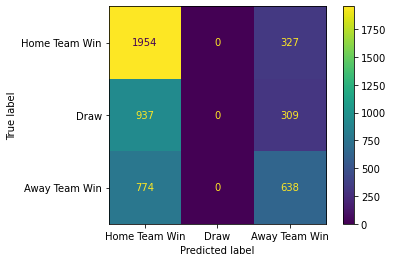

C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

Home Team Win       0.50      0.45      0.48      1412
         Draw       0.00      0.00      0.00      1246
Away Team Win       0.53      0.86      0.66      2281

     accuracy                           0.52      4939
    macro avg       0.34      0.44      0.38      4939
 weighted avg       0.39      0.52      0.44      4939


Accuracy:  0.5248025916177363
Recall:  0.5248025916177363
Precision:  0.641673767506309


----------------------------------------------------------
Predictions for BW


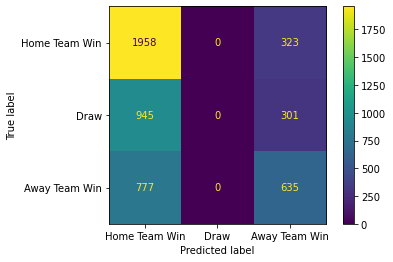

C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

Home Team Win       0.50      0.45      0.48      1412
         Draw       0.00      0.00      0.00      1246
Away Team Win       0.53      0.86      0.66      2281

     accuracy                           0.53      4939
    macro avg       0.35      0.44      0.38      4939
 weighted avg       0.39      0.53      0.44      4939


Accuracy:  0.5250050617533913
Recall:  0.5250050617533913
Precision:  0.6421966285642395


----------------------------------------------------------
Predictions for IW


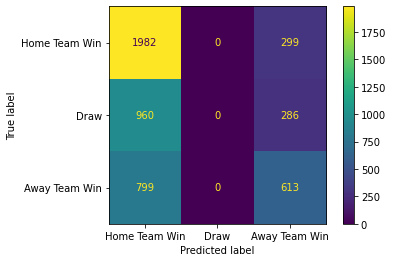

C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

Home Team Win       0.51      0.43      0.47      1412
         Draw       0.00      0.00      0.00      1246
Away Team Win       0.53      0.87      0.66      2281

     accuracy                           0.53      4939
    macro avg       0.35      0.43      0.38      4939
 weighted avg       0.39      0.53      0.44      4939


Accuracy:  0.5254100020247013
Recall:  0.5254100020247013
Precision:  0.6432447320937196


----------------------------------------------------------
Predictions for LB


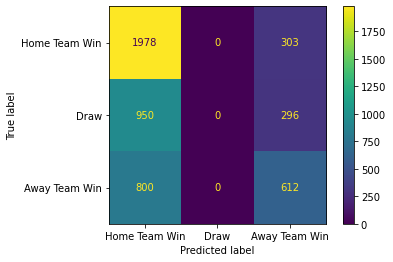

               precision    recall  f1-score   support

Home Team Win       0.51      0.43      0.47      1412
         Draw       0.00      0.00      0.00      1246
Away Team Win       0.53      0.87      0.66      2281

     accuracy                           0.52      4939
    macro avg       0.35      0.43      0.37      4939
 weighted avg       0.39      0.52      0.44      4939


Accuracy:  0.5243976513464264
Recall:  0.5243976513464264
Precision:  0.6417960052415413


----------------------------------------------------------


C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\George\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#Print results
for i in range(len(result_outcomes)):
    print("Predictions for " + clf_title[i])
    prediction_metrics(result_outcomes[i], result_y_predict_decoded[i])

## Multiple layer Neural Network

In [22]:
result_outcomes = [None] * len(features)
result_y_predict_decoded = [None] * len(features)

#Train module with Multiple layer Neural Network
for i in range(len(features)):
    col_features = list(features[i].columns.values)
#     del col_features[20:23]
    features_selected = features[i][col_features].copy(deep=True)
    
    visible = tf.keras.layers.Input(shape=(features_selected.shape[1]))
    hidden1 = tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(visible)
    hidden2 = tf.keras.layers.Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden1)
    hidden3 = tf.keras.layers.Dense(300, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden2)
    hidden4 = tf.keras.layers.Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden3)
    hidden5 = tf.keras.layers.Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(hidden4)
    output = tf.keras.layers.Dense(3, activation='softmax')(hidden5)

    clf = tf.keras.Model(inputs=visible, outputs=output)
    print("Predictions for " + clf_title[i])

    clf.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.CategoricalCrossentropy(), 
                metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

    result_outcomes[i],result_y_predict_decoded[i] = convert_predictions(clf, features_selected, outcomes[i])

Predictions for B365
Epoch 1/250
35/35 - 2s - loss: 1.0713 - precision_4: 0.4663 - recall_4: 0.0763 - lr: 0.0010 - 2s/epoch - 47ms/step
Epoch 2/250
35/35 - 0s - loss: 1.0631 - precision_4: 0.5889 - recall_4: 0.0119 - lr: 0.0010 - 269ms/epoch - 8ms/step
Epoch 3/250
35/35 - 0s - loss: 1.0584 - precision_4: 0.5764 - recall_4: 0.0967 - lr: 0.0010 - 249ms/epoch - 7ms/step
Epoch 4/250
35/35 - 0s - loss: 1.0417 - precision_4: 0.5740 - recall_4: 0.1998 - lr: 0.0010 - 239ms/epoch - 7ms/step
Epoch 5/250
35/35 - 0s - loss: 1.0274 - precision_4: 0.6012 - recall_4: 0.1951 - lr: 0.0010 - 240ms/epoch - 7ms/step
Epoch 6/250
35/35 - 0s - loss: 1.0310 - precision_4: 0.6024 - recall_4: 0.1953 - lr: 0.0010 - 234ms/epoch - 7ms/step
Epoch 7/250
35/35 - 0s - loss: 1.0121 - precision_4: 0.6180 - recall_4: 0.2274 - lr: 0.0010 - 231ms/epoch - 7ms/step
Epoch 8/250
35/35 - 0s - loss: 1.0112 - precision_4: 0.6236 - recall_4: 0.2281 - lr: 0.0010 - 231ms/epoch - 7ms/step
Epoch 9/250
35/35 - 0s - loss: 1.0072 - preci

Epoch 71/250
35/35 - 0s - loss: 0.9534 - precision_4: 0.6545 - recall_4: 0.3174 - lr: 3.0000e-04 - 231ms/epoch - 7ms/step
Epoch 72/250
35/35 - 0s - loss: 0.9524 - precision_4: 0.6645 - recall_4: 0.2976 - lr: 3.0000e-04 - 232ms/epoch - 7ms/step
Epoch 73/250
35/35 - 0s - loss: 0.9509 - precision_4: 0.6626 - recall_4: 0.3172 - lr: 3.0000e-04 - 230ms/epoch - 7ms/step
Epoch 74/250
35/35 - 0s - loss: 0.9547 - precision_4: 0.6547 - recall_4: 0.3152 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 75/250
35/35 - 0s - loss: 0.9550 - precision_4: 0.6553 - recall_4: 0.2990 - lr: 3.0000e-04 - 227ms/epoch - 6ms/step
Epoch 76/250
35/35 - 0s - loss: 0.9517 - precision_4: 0.6486 - recall_4: 0.3156 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 77/250
35/35 - 0s - loss: 0.9511 - precision_4: 0.6534 - recall_4: 0.3057 - lr: 3.0000e-04 - 230ms/epoch - 7ms/step
Epoch 78/250
35/35 - 0s - loss: 0.9493 - precision_4: 0.6561 - recall_4: 0.3159 - lr: 3.0000e-04 - 232ms/epoch - 7ms/step
Epoch 79/250
35/35 - 0s 

Epoch 138/250
35/35 - 0s - loss: 0.7782 - precision_4: 0.7223 - recall_4: 0.5219 - lr: 3.0000e-04 - 243ms/epoch - 7ms/step
Epoch 139/250
35/35 - 0s - loss: 0.7668 - precision_4: 0.7323 - recall_4: 0.5298 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 140/250
35/35 - 0s - loss: 0.7830 - precision_4: 0.7135 - recall_4: 0.5267 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 141/250
35/35 - 0s - loss: 0.7749 - precision_4: 0.7164 - recall_4: 0.5411 - lr: 3.0000e-04 - 224ms/epoch - 6ms/step
Epoch 142/250
35/35 - 0s - loss: 0.7498 - precision_4: 0.7412 - recall_4: 0.5426 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 143/250
35/35 - 0s - loss: 0.7559 - precision_4: 0.7214 - recall_4: 0.5471 - lr: 3.0000e-04 - 225ms/epoch - 6ms/step
Epoch 144/250
35/35 - 0s - loss: 0.7563 - precision_4: 0.7298 - recall_4: 0.5541 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 145/250
35/35 - 0s - loss: 0.7465 - precision_4: 0.7341 - recall_4: 0.5552 - lr: 3.0000e-04 - 250ms/epoch - 7ms/step
Epoch 146/250
35

Epoch 205/250
35/35 - 0s - loss: 0.4050 - precision_4: 0.8694 - recall_4: 0.8106 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 206/250
35/35 - 0s - loss: 0.4023 - precision_4: 0.8706 - recall_4: 0.8067 - lr: 3.0000e-04 - 232ms/epoch - 7ms/step
Epoch 207/250
35/35 - 0s - loss: 0.4260 - precision_4: 0.8503 - recall_4: 0.7960 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 208/250
35/35 - 0s - loss: 0.3926 - precision_4: 0.8754 - recall_4: 0.8189 - lr: 3.0000e-04 - 239ms/epoch - 7ms/step
Epoch 209/250
35/35 - 0s - loss: 0.3998 - precision_4: 0.8654 - recall_4: 0.8058 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 210/250
35/35 - 0s - loss: 0.3997 - precision_4: 0.8726 - recall_4: 0.8135 - lr: 3.0000e-04 - 255ms/epoch - 7ms/step
Epoch 211/250
35/35 - 0s - loss: 0.3668 - precision_4: 0.8874 - recall_4: 0.8261 - lr: 3.0000e-04 - 300ms/epoch - 9ms/step
Epoch 212/250
35/35 - 0s - loss: 0.3947 - precision_4: 0.8691 - recall_4: 0.8139 - lr: 3.0000e-04 - 263ms/epoch - 8ms/step
Epoch 213/250
35

Epoch 22/250
35/35 - 0s - loss: 0.2775 - precision_4: 0.9215 - recall_4: 0.8902 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s - loss: 0.2816 - precision_4: 0.9162 - recall_4: 0.8859 - lr: 3.0000e-04 - 248ms/epoch - 7ms/step
Epoch 24/250
35/35 - 0s - loss: 0.2874 - precision_4: 0.9163 - recall_4: 0.8844 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 25/250
35/35 - 0s - loss: 0.2710 - precision_4: 0.9230 - recall_4: 0.8927 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 26/250
35/35 - 0s - loss: 0.2625 - precision_4: 0.9275 - recall_4: 0.8952 - lr: 3.0000e-04 - 241ms/epoch - 7ms/step
Epoch 27/250
35/35 - 0s - loss: 0.2721 - precision_4: 0.9214 - recall_4: 0.8940 - lr: 3.0000e-04 - 231ms/epoch - 7ms/step
Epoch 28/250
35/35 - 0s - loss: 0.2429 - precision_4: 0.9364 - recall_4: 0.9080 - lr: 3.0000e-04 - 244ms/epoch - 7ms/step
Epoch 29/250
35/35 - 0s - loss: 0.2389 - precision_4: 0.9331 - recall_4: 0.9066 - lr: 3.0000e-04 - 251ms/epoch - 7ms/step
Epoch 30/250
35/35 - 0s 

Epoch 90/250
35/35 - 0s - loss: 0.0734 - precision_4: 0.9894 - recall_4: 0.9854 - lr: 9.0000e-05 - 243ms/epoch - 7ms/step
Epoch 91/250
35/35 - 0s - loss: 0.0757 - precision_4: 0.9894 - recall_4: 0.9847 - lr: 9.0000e-05 - 228ms/epoch - 7ms/step
Epoch 92/250
35/35 - 0s - loss: 0.0740 - precision_4: 0.9894 - recall_4: 0.9840 - lr: 9.0000e-05 - 226ms/epoch - 6ms/step
Epoch 93/250
35/35 - 0s - loss: 0.0704 - precision_4: 0.9894 - recall_4: 0.9847 - lr: 9.0000e-05 - 231ms/epoch - 7ms/step
Epoch 94/250
35/35 - 0s - loss: 0.0710 - precision_4: 0.9898 - recall_4: 0.9843 - lr: 9.0000e-05 - 241ms/epoch - 7ms/step
Epoch 95/250
35/35 - 0s - loss: 0.0695 - precision_4: 0.9912 - recall_4: 0.9865 - lr: 9.0000e-05 - 225ms/epoch - 6ms/step
Epoch 96/250
35/35 - 0s - loss: 0.0671 - precision_4: 0.9912 - recall_4: 0.9872 - lr: 9.0000e-05 - 225ms/epoch - 6ms/step
Epoch 97/250
35/35 - 0s - loss: 0.0691 - precision_4: 0.9905 - recall_4: 0.9863 - lr: 9.0000e-05 - 229ms/epoch - 7ms/step
Epoch 98/250
35/35 - 0s 

Epoch 157/250
35/35 - 0s - loss: 0.0455 - precision_4: 0.9930 - recall_4: 0.9906 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 158/250
35/35 - 0s - loss: 0.0400 - precision_4: 0.9955 - recall_4: 0.9928 - lr: 9.0000e-05 - 220ms/epoch - 6ms/step
Epoch 159/250
35/35 - 0s - loss: 0.0386 - precision_4: 0.9948 - recall_4: 0.9924 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 160/250
35/35 - 0s - loss: 0.0391 - precision_4: 0.9946 - recall_4: 0.9924 - lr: 9.0000e-05 - 222ms/epoch - 6ms/step
Epoch 161/250
35/35 - 0s - loss: 0.0454 - precision_4: 0.9921 - recall_4: 0.9899 - lr: 9.0000e-05 - 216ms/epoch - 6ms/step
Epoch 162/250
35/35 - 0s - loss: 0.0399 - precision_4: 0.9941 - recall_4: 0.9924 - lr: 9.0000e-05 - 229ms/epoch - 7ms/step
Epoch 163/250
35/35 - 0s - loss: 0.0403 - precision_4: 0.9941 - recall_4: 0.9924 - lr: 9.0000e-05 - 222ms/epoch - 6ms/step
Epoch 164/250
35/35 - 0s - loss: 0.0413 - precision_4: 0.9941 - recall_4: 0.9915 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 165/250
35

Epoch 224/250
35/35 - 0s - loss: 0.0218 - precision_4: 0.9989 - recall_4: 0.9975 - lr: 2.7000e-05 - 239ms/epoch - 7ms/step
Epoch 225/250
35/35 - 0s - loss: 0.0213 - precision_4: 0.9984 - recall_4: 0.9978 - lr: 2.7000e-05 - 231ms/epoch - 7ms/step
Epoch 226/250
35/35 - 0s - loss: 0.0209 - precision_4: 0.9986 - recall_4: 0.9975 - lr: 2.7000e-05 - 227ms/epoch - 6ms/step
Epoch 227/250
35/35 - 0s - loss: 0.0222 - precision_4: 0.9982 - recall_4: 0.9975 - lr: 2.7000e-05 - 235ms/epoch - 7ms/step
Epoch 228/250
35/35 - 0s - loss: 0.0212 - precision_4: 0.9989 - recall_4: 0.9978 - lr: 2.7000e-05 - 240ms/epoch - 7ms/step
Epoch 229/250
35/35 - 0s - loss: 0.0204 - precision_4: 0.9986 - recall_4: 0.9973 - lr: 2.7000e-05 - 232ms/epoch - 7ms/step
Epoch 230/250
35/35 - 0s - loss: 0.0208 - precision_4: 0.9986 - recall_4: 0.9975 - lr: 2.7000e-05 - 234ms/epoch - 7ms/step
Epoch 231/250
35/35 - 0s - loss: 0.0216 - precision_4: 0.9982 - recall_4: 0.9973 - lr: 2.7000e-05 - 231ms/epoch - 7ms/step
Epoch 232/250
35

35/35 - 0s - loss: 0.0533 - precision_4: 0.9892 - recall_4: 0.9872 - lr: 8.1000e-06 - 244ms/epoch - 7ms/step
Epoch 42/250
35/35 - 0s - loss: 0.0524 - precision_4: 0.9908 - recall_4: 0.9885 - lr: 8.1000e-06 - 229ms/epoch - 7ms/step
Epoch 43/250
35/35 - 0s - loss: 0.0524 - precision_4: 0.9903 - recall_4: 0.9881 - lr: 8.1000e-06 - 229ms/epoch - 7ms/step
Epoch 44/250
35/35 - 0s - loss: 0.0521 - precision_4: 0.9901 - recall_4: 0.9890 - lr: 8.1000e-06 - 244ms/epoch - 7ms/step
Epoch 45/250
35/35 - 0s - loss: 0.0514 - precision_4: 0.9905 - recall_4: 0.9888 - lr: 8.1000e-06 - 244ms/epoch - 7ms/step
Epoch 46/250
35/35 - 0s - loss: 0.0510 - precision_4: 0.9910 - recall_4: 0.9885 - lr: 8.1000e-06 - 235ms/epoch - 7ms/step
Epoch 47/250
35/35 - 0s - loss: 0.0506 - precision_4: 0.9910 - recall_4: 0.9894 - lr: 8.1000e-06 - 226ms/epoch - 6ms/step
Epoch 48/250
35/35 - 0s - loss: 0.0501 - precision_4: 0.9917 - recall_4: 0.9890 - lr: 8.1000e-06 - 237ms/epoch - 7ms/step
Epoch 49/250
35/35 - 0s - loss: 0.050

Epoch 109/250
35/35 - 0s - loss: 0.0360 - precision_4: 0.9950 - recall_4: 0.9939 - lr: 8.1000e-06 - 240ms/epoch - 7ms/step
Epoch 110/250
35/35 - 0s - loss: 0.0357 - precision_4: 0.9953 - recall_4: 0.9937 - lr: 8.1000e-06 - 241ms/epoch - 7ms/step
Epoch 111/250
35/35 - 0s - loss: 0.0360 - precision_4: 0.9953 - recall_4: 0.9935 - lr: 8.1000e-06 - 223ms/epoch - 6ms/step
Epoch 112/250
35/35 - 0s - loss: 0.0357 - precision_4: 0.9955 - recall_4: 0.9939 - lr: 8.1000e-06 - 226ms/epoch - 6ms/step
Epoch 113/250
35/35 - 0s - loss: 0.0354 - precision_4: 0.9950 - recall_4: 0.9935 - lr: 8.1000e-06 - 247ms/epoch - 7ms/step
Epoch 114/250
35/35 - 0s - loss: 0.0352 - precision_4: 0.9953 - recall_4: 0.9933 - lr: 8.1000e-06 - 254ms/epoch - 7ms/step
Epoch 115/250
35/35 - 0s - loss: 0.0355 - precision_4: 0.9959 - recall_4: 0.9946 - lr: 8.1000e-06 - 226ms/epoch - 6ms/step
Epoch 116/250
35/35 - 0s - loss: 0.0352 - precision_4: 0.9957 - recall_4: 0.9946 - lr: 8.1000e-06 - 232ms/epoch - 7ms/step
Epoch 117/250
35

Epoch 176/250
35/35 - 0s - loss: 0.0278 - precision_4: 0.9973 - recall_4: 0.9966 - lr: 8.1000e-06 - 224ms/epoch - 6ms/step
Epoch 177/250
35/35 - 0s - loss: 0.0279 - precision_4: 0.9971 - recall_4: 0.9966 - lr: 8.1000e-06 - 221ms/epoch - 6ms/step
Epoch 178/250
35/35 - 0s - loss: 0.0278 - precision_4: 0.9973 - recall_4: 0.9966 - lr: 8.1000e-06 - 218ms/epoch - 6ms/step
Epoch 179/250
35/35 - 0s - loss: 0.0280 - precision_4: 0.9971 - recall_4: 0.9960 - lr: 8.1000e-06 - 222ms/epoch - 6ms/step
Epoch 180/250
35/35 - 0s - loss: 0.0277 - precision_4: 0.9973 - recall_4: 0.9966 - lr: 8.1000e-06 - 222ms/epoch - 6ms/step
Epoch 181/250
35/35 - 0s - loss: 0.0275 - precision_4: 0.9977 - recall_4: 0.9969 - lr: 8.1000e-06 - 223ms/epoch - 6ms/step
Epoch 182/250
35/35 - 0s - loss: 0.0273 - precision_4: 0.9975 - recall_4: 0.9962 - lr: 8.1000e-06 - 230ms/epoch - 7ms/step
Epoch 183/250
35/35 - 0s - loss: 0.0277 - precision_4: 0.9968 - recall_4: 0.9964 - lr: 8.1000e-06 - 228ms/epoch - 7ms/step
Epoch 184/250
35

Epoch 243/250
35/35 - 0s - loss: 0.0224 - precision_4: 0.9982 - recall_4: 0.9980 - lr: 8.1000e-06 - 227ms/epoch - 6ms/step
Epoch 244/250
35/35 - 0s - loss: 0.0225 - precision_4: 0.9982 - recall_4: 0.9978 - lr: 8.1000e-06 - 236ms/epoch - 7ms/step
Epoch 245/250
35/35 - 0s - loss: 0.0222 - precision_4: 0.9984 - recall_4: 0.9978 - lr: 8.1000e-06 - 238ms/epoch - 7ms/step
Epoch 246/250
35/35 - 0s - loss: 0.0221 - precision_4: 0.9984 - recall_4: 0.9982 - lr: 8.1000e-06 - 228ms/epoch - 7ms/step
Epoch 247/250
35/35 - 0s - loss: 0.0223 - precision_4: 0.9984 - recall_4: 0.9975 - lr: 8.1000e-06 - 233ms/epoch - 7ms/step
Epoch 248/250
35/35 - 0s - loss: 0.0219 - precision_4: 0.9984 - recall_4: 0.9978 - lr: 8.1000e-06 - 249ms/epoch - 7ms/step
Epoch 249/250
35/35 - 0s - loss: 0.0217 - precision_4: 0.9984 - recall_4: 0.9982 - lr: 8.1000e-06 - 227ms/epoch - 6ms/step
Epoch 250/250
35/35 - 0s - loss: 0.0219 - precision_4: 0.9984 - recall_4: 0.9982 - lr: 8.1000e-06 - 235ms/epoch - 7ms/step
Epoch 1/250
35/3

Epoch 61/250
35/35 - 0s - loss: 0.0198 - precision_4: 0.9989 - recall_4: 0.9982 - lr: 8.1000e-06 - 258ms/epoch - 7ms/step
Epoch 62/250
35/35 - 0s - loss: 0.0197 - precision_4: 0.9986 - recall_4: 0.9980 - lr: 8.1000e-06 - 258ms/epoch - 7ms/step
Epoch 63/250
35/35 - 0s - loss: 0.0196 - precision_4: 0.9986 - recall_4: 0.9984 - lr: 8.1000e-06 - 231ms/epoch - 7ms/step
Epoch 64/250
35/35 - 0s - loss: 0.0199 - precision_4: 0.9986 - recall_4: 0.9982 - lr: 8.1000e-06 - 238ms/epoch - 7ms/step
Epoch 65/250
35/35 - 0s - loss: 0.0198 - precision_4: 0.9991 - recall_4: 0.9984 - lr: 8.1000e-06 - 239ms/epoch - 7ms/step
Epoch 66/250
35/35 - 0s - loss: 0.0195 - precision_4: 0.9991 - recall_4: 0.9980 - lr: 8.1000e-06 - 250ms/epoch - 7ms/step
Epoch 67/250
35/35 - 0s - loss: 0.0199 - precision_4: 0.9986 - recall_4: 0.9980 - lr: 8.1000e-06 - 246ms/epoch - 7ms/step
Epoch 68/250
35/35 - 0s - loss: 0.0202 - precision_4: 0.9986 - recall_4: 0.9982 - lr: 8.1000e-06 - 231ms/epoch - 7ms/step
Epoch 69/250
35/35 - 0s 

Epoch 128/250
35/35 - 0s - loss: 0.0166 - precision_4: 0.9991 - recall_4: 0.9989 - lr: 8.1000e-06 - 224ms/epoch - 6ms/step
Epoch 129/250
35/35 - 0s - loss: 0.0164 - precision_4: 0.9993 - recall_4: 0.9993 - lr: 8.1000e-06 - 223ms/epoch - 6ms/step
Epoch 130/250
35/35 - 0s - loss: 0.0167 - precision_4: 0.9991 - recall_4: 0.9987 - lr: 8.1000e-06 - 219ms/epoch - 6ms/step
Epoch 131/250
35/35 - 0s - loss: 0.0168 - precision_4: 0.9993 - recall_4: 0.9989 - lr: 8.1000e-06 - 225ms/epoch - 6ms/step
Epoch 132/250
35/35 - 0s - loss: 0.0164 - precision_4: 0.9991 - recall_4: 0.9989 - lr: 8.1000e-06 - 224ms/epoch - 6ms/step
Epoch 133/250
35/35 - 0s - loss: 0.0166 - precision_4: 0.9993 - recall_4: 0.9989 - lr: 8.1000e-06 - 213ms/epoch - 6ms/step
Epoch 134/250
35/35 - 0s - loss: 0.0172 - precision_4: 0.9991 - recall_4: 0.9989 - lr: 8.1000e-06 - 220ms/epoch - 6ms/step
Epoch 135/250
35/35 - 0s - loss: 0.0164 - precision_4: 0.9996 - recall_4: 0.9996 - lr: 8.1000e-06 - 218ms/epoch - 6ms/step
Epoch 136/250
35

Epoch 195/250
35/35 - 0s - loss: 0.0146 - precision_4: 0.9989 - recall_4: 0.9987 - lr: 8.1000e-06 - 220ms/epoch - 6ms/step
Epoch 196/250
35/35 - 0s - loss: 0.0139 - precision_4: 0.9993 - recall_4: 0.9993 - lr: 8.1000e-06 - 229ms/epoch - 7ms/step
Epoch 197/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9989 - recall_4: 0.9987 - lr: 8.1000e-06 - 222ms/epoch - 6ms/step
Epoch 198/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9993 - recall_4: 0.9993 - lr: 8.1000e-06 - 229ms/epoch - 7ms/step
Epoch 199/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9993 - recall_4: 0.9989 - lr: 8.1000e-06 - 227ms/epoch - 6ms/step
Epoch 200/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9993 - recall_4: 0.9991 - lr: 8.1000e-06 - 224ms/epoch - 6ms/step
Epoch 201/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9993 - recall_4: 0.9991 - lr: 8.1000e-06 - 258ms/epoch - 7ms/step
Epoch 202/250
35/35 - 0s - loss: 0.0141 - precision_4: 0.9989 - recall_4: 0.9987 - lr: 8.1000e-06 - 252ms/epoch - 7ms/step
Epoch 203/250
35

Epoch 12/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9998 - recall_4: 0.9998 - lr: 2.1870e-07 - 245ms/epoch - 7ms/step
Epoch 13/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9998 - recall_4: 0.9998 - lr: 2.1870e-07 - 237ms/epoch - 7ms/step
Epoch 14/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 2.1870e-07 - 233ms/epoch - 7ms/step
Epoch 15/250
35/35 - 0s - loss: 0.0140 - precision_4: 0.9998 - recall_4: 0.9998 - lr: 2.1870e-07 - 245ms/epoch - 7ms/step
Epoch 16/250
35/35 - 0s - loss: 0.0139 - precision_4: 0.9998 - recall_4: 0.9998 - lr: 2.1870e-07 - 238ms/epoch - 7ms/step
Epoch 17/250
35/35 - 0s - loss: 0.0139 - precision_4: 0.9998 - recall_4: 0.9993 - lr: 2.1870e-07 - 248ms/epoch - 7ms/step
Epoch 18/250
35/35 - 0s - loss: 0.0139 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 2.1870e-07 - 229ms/epoch - 7ms/step
Epoch 19/250
35/35 - 0s - loss: 0.0139 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 2.1870e-07 - 232ms/epoch - 7ms/step
Epoch 20/250
35/35 - 0s 

Epoch 80/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 234ms/epoch - 7ms/step
Epoch 81/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 231ms/epoch - 7ms/step
Epoch 82/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 235ms/epoch - 7ms/step
Epoch 83/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 235ms/epoch - 7ms/step
Epoch 84/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 236ms/epoch - 7ms/step
Epoch 85/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 222ms/epoch - 6ms/step
Epoch 86/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 248ms/epoch - 7ms/step
Epoch 87/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9998 - recall_4: 0.9996 - lr: 1.5943e-10 - 237ms/epoch - 7ms/step
Epoch 88/250
35/35 - 0s 

Epoch 18/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 1.1623e-13 - 231ms/epoch - 7ms/step
Epoch 19/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 1.1623e-13 - 241ms/epoch - 7ms/step
Epoch 20/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 1.1623e-13 - 240ms/epoch - 7ms/step
Epoch 21/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 1.1623e-13 - 231ms/epoch - 7ms/step
Epoch 22/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 3.4868e-14 - 239ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 3.4868e-14 - 233ms/epoch - 7ms/step
Epoch 24/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 3.4868e-14 - 237ms/epoch - 7ms/step
Epoch 25/250
35/35 - 0s - loss: 0.0135 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 3.4868e-14 - 234ms/epoch - 7ms/step
Epoch 26/250
35/35 - 0s 

Epoch 20/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 8.4729e-17 - 230ms/epoch - 7ms/step
Epoch 21/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 8.4729e-17 - 229ms/epoch - 7ms/step
Epoch 22/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 2.5419e-17 - 251ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 2.5419e-17 - 233ms/epoch - 7ms/step
Epoch 24/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 2.5419e-17 - 235ms/epoch - 7ms/step
Epoch 25/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 2.5419e-17 - 219ms/epoch - 6ms/step
Epoch 26/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 2.5419e-17 - 235ms/epoch - 7ms/step
Epoch 1/250
35/35 - 0s - loss: 0.0138 - precision_4: 0.9995 - recall_4: 0.9993 - lr: 2.5419e-17 - 249ms/epoch - 7ms/step
Epoch 2/250
35/35 - 0s - 

Epoch 7/250
35/35 - 0s - loss: 1.0176 - precision_5: 0.5939 - recall_5: 0.2490 - lr: 0.0010 - 230ms/epoch - 7ms/step
Epoch 8/250
35/35 - 0s - loss: 1.0132 - precision_5: 0.6041 - recall_5: 0.2643 - lr: 0.0010 - 238ms/epoch - 7ms/step
Epoch 9/250
35/35 - 0s - loss: 1.0171 - precision_5: 0.5840 - recall_5: 0.2526 - lr: 0.0010 - 229ms/epoch - 7ms/step
Epoch 10/250
35/35 - 0s - loss: 1.0178 - precision_5: 0.6157 - recall_5: 0.2094 - lr: 0.0010 - 232ms/epoch - 7ms/step
Epoch 11/250
35/35 - 0s - loss: 1.0070 - precision_5: 0.6162 - recall_5: 0.2547 - lr: 0.0010 - 236ms/epoch - 7ms/step
Epoch 12/250
35/35 - 0s - loss: 1.0037 - precision_5: 0.6175 - recall_5: 0.2583 - lr: 0.0010 - 233ms/epoch - 7ms/step
Epoch 13/250
35/35 - 0s - loss: 1.0022 - precision_5: 0.6271 - recall_5: 0.2576 - lr: 0.0010 - 242ms/epoch - 7ms/step
Epoch 14/250
35/35 - 0s - loss: 1.0087 - precision_5: 0.6070 - recall_5: 0.2425 - lr: 0.0010 - 245ms/epoch - 7ms/step
Epoch 15/250
35/35 - 0s - loss: 1.0015 - precision_5: 0.621

Epoch 77/250
35/35 - 0s - loss: 0.9525 - precision_5: 0.6543 - recall_5: 0.3181 - lr: 0.0010 - 235ms/epoch - 7ms/step
Epoch 78/250
35/35 - 0s - loss: 0.9560 - precision_5: 0.6438 - recall_5: 0.3147 - lr: 0.0010 - 238ms/epoch - 7ms/step
Epoch 79/250
35/35 - 0s - loss: 0.9533 - precision_5: 0.6568 - recall_5: 0.3186 - lr: 0.0010 - 235ms/epoch - 7ms/step
Epoch 80/250
35/35 - 0s - loss: 0.9593 - precision_5: 0.6517 - recall_5: 0.3069 - lr: 0.0010 - 217ms/epoch - 6ms/step
Epoch 81/250
35/35 - 0s - loss: 0.9540 - precision_5: 0.6507 - recall_5: 0.3240 - lr: 0.0010 - 235ms/epoch - 7ms/step
Epoch 82/250
35/35 - 0s - loss: 0.9537 - precision_5: 0.6431 - recall_5: 0.3186 - lr: 0.0010 - 229ms/epoch - 7ms/step
Epoch 83/250
35/35 - 0s - loss: 0.9577 - precision_5: 0.6511 - recall_5: 0.3039 - lr: 0.0010 - 245ms/epoch - 7ms/step
Epoch 84/250
35/35 - 0s - loss: 0.9508 - precision_5: 0.6422 - recall_5: 0.3267 - lr: 0.0010 - 228ms/epoch - 7ms/step
Epoch 85/250
35/35 - 0s - loss: 0.9481 - precision_5: 0.

35/35 - 0s - loss: 0.5816 - precision_5: 0.7955 - recall_5: 0.6938 - lr: 0.0010 - 225ms/epoch - 6ms/step
Epoch 147/250
35/35 - 0s - loss: 0.6011 - precision_5: 0.7763 - recall_5: 0.6763 - lr: 0.0010 - 217ms/epoch - 6ms/step
Epoch 148/250
35/35 - 0s - loss: 0.5711 - precision_5: 0.7981 - recall_5: 0.6902 - lr: 0.0010 - 221ms/epoch - 6ms/step
Epoch 149/250
35/35 - 0s - loss: 0.5493 - precision_5: 0.8058 - recall_5: 0.7123 - lr: 0.0010 - 222ms/epoch - 6ms/step
Epoch 150/250
35/35 - 0s - loss: 0.5112 - precision_5: 0.8127 - recall_5: 0.7309 - lr: 0.0010 - 221ms/epoch - 6ms/step
Epoch 151/250
35/35 - 0s - loss: 0.5055 - precision_5: 0.8207 - recall_5: 0.7375 - lr: 0.0010 - 225ms/epoch - 6ms/step
Epoch 152/250
35/35 - 0s - loss: 0.4872 - precision_5: 0.8287 - recall_5: 0.7447 - lr: 0.0010 - 224ms/epoch - 6ms/step
Epoch 153/250
35/35 - 0s - loss: 0.4732 - precision_5: 0.8365 - recall_5: 0.7530 - lr: 0.0010 - 223ms/epoch - 6ms/step
Epoch 154/250
35/35 - 0s - loss: 0.4892 - precision_5: 0.8220 

Epoch 215/250
35/35 - 0s - loss: 0.0883 - precision_5: 0.9749 - recall_5: 0.9703 - lr: 0.0010 - 221ms/epoch - 6ms/step
Epoch 216/250
35/35 - 0s - loss: 0.0927 - precision_5: 0.9725 - recall_5: 0.9692 - lr: 0.0010 - 220ms/epoch - 6ms/step
Epoch 217/250
35/35 - 0s - loss: 0.1234 - precision_5: 0.9543 - recall_5: 0.9489 - lr: 0.0010 - 229ms/epoch - 7ms/step
Epoch 218/250
35/35 - 0s - loss: 0.1702 - precision_5: 0.9438 - recall_5: 0.9368 - lr: 0.0010 - 267ms/epoch - 8ms/step
Epoch 219/250
35/35 - 0s - loss: 0.2806 - precision_5: 0.9038 - recall_5: 0.8938 - lr: 0.0010 - 273ms/epoch - 8ms/step
Epoch 220/250
35/35 - 0s - loss: 0.1807 - precision_5: 0.9384 - recall_5: 0.9318 - lr: 0.0010 - 241ms/epoch - 7ms/step
Epoch 221/250
35/35 - 0s - loss: 0.1222 - precision_5: 0.9576 - recall_5: 0.9492 - lr: 0.0010 - 238ms/epoch - 7ms/step
Epoch 222/250
35/35 - 0s - loss: 0.0736 - precision_5: 0.9801 - recall_5: 0.9759 - lr: 0.0010 - 247ms/epoch - 7ms/step
Epoch 223/250
35/35 - 0s - loss: 0.0346 - precis

Epoch 33/250
35/35 - 0s - loss: 0.0239 - precision_5: 0.9975 - recall_5: 0.9960 - lr: 3.0000e-04 - 220ms/epoch - 6ms/step
Epoch 34/250
35/35 - 0s - loss: 0.0242 - precision_5: 0.9955 - recall_5: 0.9946 - lr: 3.0000e-04 - 223ms/epoch - 6ms/step
Epoch 35/250
35/35 - 0s - loss: 0.0231 - precision_5: 0.9973 - recall_5: 0.9962 - lr: 3.0000e-04 - 223ms/epoch - 6ms/step
Epoch 36/250
35/35 - 0s - loss: 0.0224 - precision_5: 0.9975 - recall_5: 0.9955 - lr: 3.0000e-04 - 222ms/epoch - 6ms/step
Epoch 37/250
35/35 - 0s - loss: 0.0234 - precision_5: 0.9964 - recall_5: 0.9953 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 38/250
35/35 - 0s - loss: 0.0220 - precision_5: 0.9971 - recall_5: 0.9962 - lr: 3.0000e-04 - 233ms/epoch - 7ms/step
Epoch 39/250
35/35 - 0s - loss: 0.0220 - precision_5: 0.9973 - recall_5: 0.9971 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 40/250
35/35 - 0s - loss: 0.0224 - precision_5: 0.9957 - recall_5: 0.9953 - lr: 3.0000e-04 - 221ms/epoch - 6ms/step
Epoch 41/250
35/35 - 0s 

Epoch 101/250
35/35 - 0s - loss: 0.0084 - precision_5: 0.9986 - recall_5: 0.9982 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 102/250
35/35 - 0s - loss: 0.0072 - precision_5: 0.9991 - recall_5: 0.9989 - lr: 9.0000e-05 - 216ms/epoch - 6ms/step
Epoch 103/250
35/35 - 0s - loss: 0.0073 - precision_5: 0.9995 - recall_5: 0.9984 - lr: 9.0000e-05 - 224ms/epoch - 6ms/step
Epoch 104/250
35/35 - 0s - loss: 0.0065 - precision_5: 0.9993 - recall_5: 0.9989 - lr: 9.0000e-05 - 225ms/epoch - 6ms/step
Epoch 105/250
35/35 - 0s - loss: 0.0065 - precision_5: 0.9991 - recall_5: 0.9991 - lr: 9.0000e-05 - 222ms/epoch - 6ms/step
Epoch 106/250
35/35 - 0s - loss: 0.0068 - precision_5: 0.9991 - recall_5: 0.9989 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 107/250
35/35 - 0s - loss: 0.0073 - precision_5: 0.9993 - recall_5: 0.9984 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 108/250
35/35 - 0s - loss: 0.0076 - precision_5: 0.9984 - recall_5: 0.9982 - lr: 9.0000e-05 - 223ms/epoch - 6ms/step
Epoch 109/250
35

Epoch 168/250
35/35 - 0s - loss: 0.0033 - precision_5: 0.9998 - recall_5: 0.9998 - lr: 8.1000e-06 - 243ms/epoch - 7ms/step
Epoch 169/250
35/35 - 0s - loss: 0.0033 - precision_5: 0.9998 - recall_5: 0.9998 - lr: 8.1000e-06 - 229ms/epoch - 7ms/step
Epoch 170/250
35/35 - 0s - loss: 0.0033 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 8.1000e-06 - 221ms/epoch - 6ms/step
Epoch 171/250
35/35 - 0s - loss: 0.0033 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 8.1000e-06 - 223ms/epoch - 6ms/step
Epoch 172/250
35/35 - 0s - loss: 0.0033 - precision_5: 0.9998 - recall_5: 0.9998 - lr: 8.1000e-06 - 221ms/epoch - 6ms/step
Epoch 173/250
35/35 - 0s - loss: 0.0033 - precision_5: 0.9998 - recall_5: 0.9998 - lr: 8.1000e-06 - 218ms/epoch - 6ms/step
Epoch 174/250
35/35 - 0s - loss: 0.0033 - precision_5: 0.9998 - recall_5: 0.9998 - lr: 8.1000e-06 - 219ms/epoch - 6ms/step
Epoch 175/250
35/35 - 0s - loss: 0.0033 - precision_5: 0.9998 - recall_5: 0.9998 - lr: 8.1000e-06 - 219ms/epoch - 6ms/step
Epoch 176/250
35

Epoch 235/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 5.9049e-09 - 225ms/epoch - 6ms/step
Epoch 236/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 5.9049e-09 - 217ms/epoch - 6ms/step
Epoch 237/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 5.9049e-09 - 221ms/epoch - 6ms/step
Epoch 238/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 1.7715e-09 - 227ms/epoch - 6ms/step
Epoch 239/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 1.7715e-09 - 223ms/epoch - 6ms/step
Epoch 240/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 1.7715e-09 - 244ms/epoch - 7ms/step
Epoch 241/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 1.7715e-09 - 229ms/epoch - 7ms/step
Epoch 242/250
35/35 - 0s - loss: 0.0032 - precision_5: 1.0000 - recall_5: 1.0000 - lr: 1.7715e-09 - 227ms/epoch - 6ms/step
Epoch 243/250
35

35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 229ms/epoch - 7ms/step
Epoch 53/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 235ms/epoch - 7ms/step
Epoch 54/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 248ms/epoch - 7ms/step
Epoch 55/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 241ms/epoch - 7ms/step
Epoch 56/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 234ms/epoch - 7ms/step
Epoch 57/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 233ms/epoch - 7ms/step
Epoch 58/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 231ms/epoch - 7ms/step
Epoch 59/250
35/35 - 0s - loss: 0.0196 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.2914e-12 - 252ms/epoch - 7ms/step
Epoch 60/250
35/35 - 0s - loss: 0.019

Epoch 1/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 246ms/epoch - 7ms/step
Epoch 2/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 261ms/epoch - 7ms/step
Epoch 3/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 218ms/epoch - 6ms/step
Epoch 4/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 224ms/epoch - 6ms/step
Epoch 5/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 225ms/epoch - 6ms/step
Epoch 6/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 247ms/epoch - 7ms/step
Epoch 7/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 240ms/epoch - 7ms/step
Epoch 8/250
35/35 - 0s - loss: 0.0195 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 9.4143e-16 - 229ms/epoch - 7ms/step
Epoch 9/250
35/35 - 0s - loss: 0

Epoch 5/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 220ms/epoch - 6ms/step
Epoch 6/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 248ms/epoch - 7ms/step
Epoch 7/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 245ms/epoch - 7ms/step
Epoch 8/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 262ms/epoch - 7ms/step
Epoch 9/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 290ms/epoch - 8ms/step
Epoch 10/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 261ms/epoch - 7ms/step
Epoch 11/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 2.2877e-18 - 254ms/epoch - 7ms/step
Epoch 12/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 6.8630e-19 - 256ms/epoch - 7ms/step
Epoch 13/250
35/35 - 0s - los

Epoch 17/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.6677e-21 - 229ms/epoch - 7ms/step
Epoch 18/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.6677e-21 - 230ms/epoch - 7ms/step
Epoch 19/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.6677e-21 - 236ms/epoch - 7ms/step
Epoch 20/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.6677e-21 - 231ms/epoch - 7ms/step
Epoch 21/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 1.6677e-21 - 245ms/epoch - 7ms/step
Epoch 22/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 5.0032e-22 - 231ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 5.0032e-22 - 237ms/epoch - 7ms/step
Epoch 24/250
35/35 - 0s - loss: 0.0197 - precision_5: 0.9942 - recall_5: 0.9942 - lr: 5.0032e-22 - 231ms/epoch - 7ms/step
Epoch 25/250
35/35 - 0s 

35/35 - 0s - loss: 0.9883 - precision_6: 0.6148 - recall_6: 0.2970 - lr: 0.0010 - 220ms/epoch - 6ms/step
Epoch 62/250
35/35 - 0s - loss: 0.9890 - precision_6: 0.6443 - recall_6: 0.2592 - lr: 0.0010 - 224ms/epoch - 6ms/step
Epoch 63/250
35/35 - 0s - loss: 0.9691 - precision_6: 0.6543 - recall_6: 0.2934 - lr: 0.0010 - 224ms/epoch - 6ms/step
Epoch 64/250
35/35 - 0s - loss: 0.9701 - precision_6: 0.6425 - recall_6: 0.2956 - lr: 0.0010 - 224ms/epoch - 6ms/step
Epoch 65/250
35/35 - 0s - loss: 0.9732 - precision_6: 0.6293 - recall_6: 0.3021 - lr: 0.0010 - 224ms/epoch - 6ms/step
Epoch 66/250
35/35 - 0s - loss: 0.9730 - precision_6: 0.6283 - recall_6: 0.3042 - lr: 0.0010 - 222ms/epoch - 6ms/step
Epoch 67/250
35/35 - 0s - loss: 0.9691 - precision_6: 0.6413 - recall_6: 0.2920 - lr: 0.0010 - 228ms/epoch - 7ms/step
Epoch 68/250
35/35 - 0s - loss: 0.9778 - precision_6: 0.6257 - recall_6: 0.3001 - lr: 0.0010 - 224ms/epoch - 6ms/step
Epoch 69/250
35/35 - 0s - loss: 0.9736 - precision_6: 0.6399 - recall

Epoch 131/250
35/35 - 0s - loss: 0.8182 - precision_6: 0.7045 - recall_6: 0.4463 - lr: 0.0010 - 219ms/epoch - 6ms/step
Epoch 132/250
35/35 - 0s - loss: 0.8025 - precision_6: 0.7124 - recall_6: 0.4682 - lr: 0.0010 - 226ms/epoch - 6ms/step
Epoch 133/250
35/35 - 0s - loss: 0.8024 - precision_6: 0.7111 - recall_6: 0.4574 - lr: 0.0010 - 222ms/epoch - 6ms/step
Epoch 134/250
35/35 - 0s - loss: 0.7906 - precision_6: 0.7103 - recall_6: 0.4832 - lr: 0.0010 - 219ms/epoch - 6ms/step
Epoch 135/250
35/35 - 0s - loss: 0.7745 - precision_6: 0.7144 - recall_6: 0.4895 - lr: 0.0010 - 225ms/epoch - 6ms/step
Epoch 136/250
35/35 - 0s - loss: 0.7866 - precision_6: 0.7122 - recall_6: 0.5039 - lr: 0.0010 - 214ms/epoch - 6ms/step
Epoch 137/250
35/35 - 0s - loss: 0.7694 - precision_6: 0.7352 - recall_6: 0.4846 - lr: 0.0010 - 221ms/epoch - 6ms/step
Epoch 138/250
35/35 - 0s - loss: 0.7578 - precision_6: 0.7272 - recall_6: 0.5192 - lr: 0.0010 - 222ms/epoch - 6ms/step
Epoch 139/250
35/35 - 0s - loss: 0.7336 - precis

Epoch 200/250
35/35 - 0s - loss: 0.1631 - precision_6: 0.9452 - recall_6: 0.9309 - lr: 0.0010 - 233ms/epoch - 7ms/step
Epoch 201/250
35/35 - 0s - loss: 0.1724 - precision_6: 0.9395 - recall_6: 0.9262 - lr: 0.0010 - 264ms/epoch - 8ms/step
Epoch 202/250
35/35 - 0s - loss: 0.2021 - precision_6: 0.9278 - recall_6: 0.9141 - lr: 0.0010 - 231ms/epoch - 7ms/step
Epoch 203/250
35/35 - 0s - loss: 0.1519 - precision_6: 0.9517 - recall_6: 0.9393 - lr: 0.0010 - 239ms/epoch - 7ms/step
Epoch 204/250
35/35 - 0s - loss: 0.1710 - precision_6: 0.9411 - recall_6: 0.9278 - lr: 0.0010 - 243ms/epoch - 7ms/step
Epoch 205/250
35/35 - 0s - loss: 0.1677 - precision_6: 0.9451 - recall_6: 0.9330 - lr: 0.0010 - 229ms/epoch - 7ms/step
Epoch 206/250
35/35 - 0s - loss: 0.1410 - precision_6: 0.9549 - recall_6: 0.9435 - lr: 0.0010 - 248ms/epoch - 7ms/step
Epoch 207/250
35/35 - 0s - loss: 0.1828 - precision_6: 0.9380 - recall_6: 0.9253 - lr: 0.0010 - 238ms/epoch - 7ms/step
Epoch 208/250
35/35 - 0s - loss: 0.1690 - precis

35/35 - 0s - loss: 0.0767 - precision_6: 0.9785 - recall_6: 0.9739 - lr: 0.0010 - 238ms/epoch - 7ms/step
Epoch 20/250
35/35 - 0s - loss: 0.0956 - precision_6: 0.9669 - recall_6: 0.9600 - lr: 0.0010 - 273ms/epoch - 8ms/step
Epoch 21/250
35/35 - 0s - loss: 0.1493 - precision_6: 0.9510 - recall_6: 0.9440 - lr: 0.0010 - 222ms/epoch - 6ms/step
Epoch 22/250
35/35 - 0s - loss: 0.1484 - precision_6: 0.9461 - recall_6: 0.9397 - lr: 0.0010 - 256ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s - loss: 0.1882 - precision_6: 0.9373 - recall_6: 0.9309 - lr: 0.0010 - 228ms/epoch - 7ms/step
Epoch 24/250
35/35 - 0s - loss: 0.1145 - precision_6: 0.9655 - recall_6: 0.9570 - lr: 0.0010 - 226ms/epoch - 6ms/step
Epoch 25/250
35/35 - 0s - loss: 0.0818 - precision_6: 0.9753 - recall_6: 0.9694 - lr: 0.0010 - 233ms/epoch - 7ms/step
Epoch 26/250
35/35 - 0s - loss: 0.1244 - precision_6: 0.9625 - recall_6: 0.9525 - lr: 0.0010 - 223ms/epoch - 6ms/step
Epoch 27/250
35/35 - 0s - loss: 0.0969 - precision_6: 0.9695 - recall

Epoch 87/250
35/35 - 0s - loss: 0.0072 - precision_6: 0.9998 - recall_6: 0.9989 - lr: 9.0000e-05 - 235ms/epoch - 7ms/step
Epoch 88/250
35/35 - 0s - loss: 0.0071 - precision_6: 0.9995 - recall_6: 0.9987 - lr: 9.0000e-05 - 233ms/epoch - 7ms/step
Epoch 89/250
35/35 - 0s - loss: 0.0072 - precision_6: 0.9998 - recall_6: 0.9987 - lr: 9.0000e-05 - 232ms/epoch - 7ms/step
Epoch 90/250
35/35 - 0s - loss: 0.0073 - precision_6: 0.9995 - recall_6: 0.9982 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 91/250
35/35 - 0s - loss: 0.0071 - precision_6: 0.9993 - recall_6: 0.9984 - lr: 9.0000e-05 - 223ms/epoch - 6ms/step
Epoch 92/250
35/35 - 0s - loss: 0.0073 - precision_6: 0.9991 - recall_6: 0.9989 - lr: 9.0000e-05 - 227ms/epoch - 6ms/step
Epoch 93/250
35/35 - 0s - loss: 0.0073 - precision_6: 0.9995 - recall_6: 0.9984 - lr: 9.0000e-05 - 236ms/epoch - 7ms/step
Epoch 94/250
35/35 - 0s - loss: 0.0070 - precision_6: 1.0000 - recall_6: 0.9996 - lr: 9.0000e-05 - 237ms/epoch - 7ms/step
Epoch 95/250
35/35 - 0s 

Epoch 154/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 2.4300e-06 - 220ms/epoch - 6ms/step
Epoch 155/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 2.4300e-06 - 218ms/epoch - 6ms/step
Epoch 156/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 2.4300e-06 - 221ms/epoch - 6ms/step
Epoch 157/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 2.4300e-06 - 233ms/epoch - 7ms/step
Epoch 158/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 2.4300e-06 - 224ms/epoch - 6ms/step
Epoch 159/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 2.4300e-06 - 219ms/epoch - 6ms/step
Epoch 160/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 7.2900e-07 - 219ms/epoch - 6ms/step
Epoch 161/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 7.2900e-07 - 222ms/epoch - 6ms/step
Epoch 162/250
35

Epoch 221/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 221ms/epoch - 6ms/step
Epoch 222/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 222ms/epoch - 6ms/step
Epoch 223/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 220ms/epoch - 6ms/step
Epoch 224/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 215ms/epoch - 6ms/step
Epoch 225/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 219ms/epoch - 6ms/step
Epoch 226/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 223ms/epoch - 6ms/step
Epoch 227/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 221ms/epoch - 6ms/step
Epoch 228/250
35/35 - 0s - loss: 0.0047 - precision_6: 1.0000 - recall_6: 1.0000 - lr: 5.3144e-10 - 222ms/epoch - 6ms/step
Epoch 229/250
35

35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 221ms/epoch - 6ms/step
Epoch 14/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 220ms/epoch - 6ms/step
Epoch 15/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 217ms/epoch - 6ms/step
Epoch 16/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 222ms/epoch - 6ms/step
Epoch 17/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 219ms/epoch - 6ms/step
Epoch 18/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 220ms/epoch - 6ms/step
Epoch 19/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 217ms/epoch - 6ms/step
Epoch 20/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 3.8742e-13 - 222ms/epoch - 6ms/step
Epoch 21/250
35/35 - 0s - loss: 0.036

Epoch 25/250
35/35 - 0s - loss: 0.0366 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 217ms/epoch - 6ms/step
Epoch 26/250
35/35 - 0s - loss: 0.0366 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 219ms/epoch - 6ms/step
Epoch 27/250
35/35 - 0s - loss: 0.0366 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 220ms/epoch - 6ms/step
Epoch 28/250
35/35 - 0s - loss: 0.0366 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 226ms/epoch - 6ms/step
Epoch 1/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 236ms/epoch - 7ms/step
Epoch 2/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 226ms/epoch - 6ms/step
Epoch 3/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 225ms/epoch - 6ms/step
Epoch 4/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.8243e-16 - 225ms/epoch - 6ms/step
Epoch 5/250
35/35 - 0s - los

Epoch 20/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 6.8630e-19 - 224ms/epoch - 6ms/step
Epoch 21/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 6.8630e-19 - 231ms/epoch - 7ms/step
Epoch 22/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.0589e-19 - 230ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.0589e-19 - 243ms/epoch - 7ms/step
Epoch 1/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.0589e-19 - 260ms/epoch - 7ms/step
Epoch 2/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.0589e-19 - 238ms/epoch - 7ms/step
Epoch 3/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.0589e-19 - 227ms/epoch - 6ms/step
Epoch 4/250
35/35 - 0s - loss: 0.0368 - precision_6: 0.9881 - recall_6: 0.9876 - lr: 2.0589e-19 - 239ms/epoch - 7ms/step
Epoch 5/250
35/35 - 0s - los

Epoch 41/250
35/35 - 0s - loss: 0.9935 - precision_7: 0.6256 - recall_7: 0.2819 - lr: 0.0010 - 226ms/epoch - 6ms/step
Epoch 42/250
35/35 - 0s - loss: 1.0050 - precision_7: 0.6557 - recall_7: 0.2146 - lr: 0.0010 - 222ms/epoch - 6ms/step
Epoch 43/250
35/35 - 0s - loss: 0.9878 - precision_7: 0.6426 - recall_7: 0.2738 - lr: 0.0010 - 218ms/epoch - 6ms/step
Epoch 44/250
35/35 - 0s - loss: 0.9802 - precision_7: 0.6501 - recall_7: 0.2792 - lr: 0.0010 - 219ms/epoch - 6ms/step
Epoch 45/250
35/35 - 0s - loss: 0.9821 - precision_7: 0.6394 - recall_7: 0.2844 - lr: 0.0010 - 220ms/epoch - 6ms/step
Epoch 46/250
35/35 - 0s - loss: 0.9746 - precision_7: 0.6569 - recall_7: 0.2787 - lr: 3.0000e-04 - 224ms/epoch - 6ms/step
Epoch 47/250
35/35 - 0s - loss: 0.9725 - precision_7: 0.6437 - recall_7: 0.2967 - lr: 3.0000e-04 - 222ms/epoch - 6ms/step
Epoch 48/250
35/35 - 0s - loss: 0.9744 - precision_7: 0.6446 - recall_7: 0.2889 - lr: 3.0000e-04 - 219ms/epoch - 6ms/step
Epoch 49/250
35/35 - 0s - loss: 0.9696 - pre

Epoch 109/250
35/35 - 0s - loss: 0.8881 - precision_7: 0.6699 - recall_7: 0.4090 - lr: 3.0000e-04 - 225ms/epoch - 6ms/step
Epoch 110/250
35/35 - 0s - loss: 0.8754 - precision_7: 0.6834 - recall_7: 0.3978 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 111/250
35/35 - 0s - loss: 0.8772 - precision_7: 0.6735 - recall_7: 0.4047 - lr: 3.0000e-04 - 223ms/epoch - 6ms/step
Epoch 112/250
35/35 - 0s - loss: 0.8585 - precision_7: 0.6811 - recall_7: 0.4315 - lr: 3.0000e-04 - 228ms/epoch - 7ms/step
Epoch 113/250
35/35 - 0s - loss: 0.8583 - precision_7: 0.6778 - recall_7: 0.4236 - lr: 3.0000e-04 - 229ms/epoch - 7ms/step
Epoch 114/250
35/35 - 0s - loss: 0.8507 - precision_7: 0.6853 - recall_7: 0.4340 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 115/250
35/35 - 0s - loss: 0.8535 - precision_7: 0.6918 - recall_7: 0.4369 - lr: 3.0000e-04 - 228ms/epoch - 7ms/step
Epoch 116/250
35/35 - 0s - loss: 0.8423 - precision_7: 0.6856 - recall_7: 0.4425 - lr: 3.0000e-04 - 228ms/epoch - 7ms/step
Epoch 117/250
35

Epoch 176/250
35/35 - 0s - loss: 0.5274 - precision_7: 0.8251 - recall_7: 0.7282 - lr: 3.0000e-04 - 254ms/epoch - 7ms/step
Epoch 177/250
35/35 - 0s - loss: 0.5219 - precision_7: 0.8177 - recall_7: 0.7298 - lr: 3.0000e-04 - 231ms/epoch - 7ms/step
Epoch 178/250
35/35 - 0s - loss: 0.5091 - precision_7: 0.8330 - recall_7: 0.7429 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 179/250
35/35 - 0s - loss: 0.5354 - precision_7: 0.8093 - recall_7: 0.7273 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 180/250
35/35 - 0s - loss: 0.5113 - precision_7: 0.8281 - recall_7: 0.7433 - lr: 3.0000e-04 - 231ms/epoch - 7ms/step
Epoch 181/250
35/35 - 0s - loss: 0.4982 - precision_7: 0.8354 - recall_7: 0.7503 - lr: 3.0000e-04 - 242ms/epoch - 7ms/step
Epoch 182/250
35/35 - 0s - loss: 0.4956 - precision_7: 0.8360 - recall_7: 0.7559 - lr: 3.0000e-04 - 240ms/epoch - 7ms/step
Epoch 183/250
35/35 - 0s - loss: 0.5227 - precision_7: 0.8183 - recall_7: 0.7375 - lr: 3.0000e-04 - 223ms/epoch - 6ms/step
Epoch 184/250
35

Epoch 243/250
35/35 - 0s - loss: 0.2601 - precision_7: 0.9157 - recall_7: 0.8920 - lr: 3.0000e-04 - 227ms/epoch - 6ms/step
Epoch 244/250
35/35 - 0s - loss: 0.2124 - precision_7: 0.9375 - recall_7: 0.9179 - lr: 3.0000e-04 - 233ms/epoch - 7ms/step
Epoch 245/250
35/35 - 0s - loss: 0.2058 - precision_7: 0.9436 - recall_7: 0.9228 - lr: 3.0000e-04 - 235ms/epoch - 7ms/step
Epoch 246/250
35/35 - 0s - loss: 0.1993 - precision_7: 0.9444 - recall_7: 0.9251 - lr: 3.0000e-04 - 231ms/epoch - 7ms/step
Epoch 247/250
35/35 - 0s - loss: 0.1968 - precision_7: 0.9438 - recall_7: 0.9255 - lr: 3.0000e-04 - 225ms/epoch - 6ms/step
Epoch 248/250
35/35 - 0s - loss: 0.1821 - precision_7: 0.9558 - recall_7: 0.9341 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 249/250
35/35 - 0s - loss: 0.1987 - precision_7: 0.9465 - recall_7: 0.9276 - lr: 3.0000e-04 - 227ms/epoch - 6ms/step
Epoch 250/250
35/35 - 0s - loss: 0.2174 - precision_7: 0.9331 - recall_7: 0.9105 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 1/250
35/3

Epoch 61/250
35/35 - 0s - loss: 0.1679 - precision_7: 0.9501 - recall_7: 0.9381 - lr: 3.0000e-04 - 238ms/epoch - 7ms/step
Epoch 62/250
35/35 - 0s - loss: 0.1487 - precision_7: 0.9590 - recall_7: 0.9462 - lr: 3.0000e-04 - 232ms/epoch - 7ms/step
Epoch 63/250
35/35 - 0s - loss: 0.1607 - precision_7: 0.9533 - recall_7: 0.9411 - lr: 3.0000e-04 - 241ms/epoch - 7ms/step
Epoch 64/250
35/35 - 0s - loss: 0.1618 - precision_7: 0.9512 - recall_7: 0.9393 - lr: 3.0000e-04 - 226ms/epoch - 6ms/step
Epoch 65/250
35/35 - 0s - loss: 0.1298 - precision_7: 0.9670 - recall_7: 0.9566 - lr: 3.0000e-04 - 240ms/epoch - 7ms/step
Epoch 66/250
35/35 - 0s - loss: 0.1152 - precision_7: 0.9739 - recall_7: 0.9665 - lr: 3.0000e-04 - 245ms/epoch - 7ms/step
Epoch 67/250
35/35 - 0s - loss: 0.1224 - precision_7: 0.9698 - recall_7: 0.9615 - lr: 3.0000e-04 - 239ms/epoch - 7ms/step
Epoch 68/250
35/35 - 0s - loss: 0.1269 - precision_7: 0.9659 - recall_7: 0.9552 - lr: 3.0000e-04 - 234ms/epoch - 7ms/step
Epoch 69/250
35/35 - 0s 

Epoch 128/250
35/35 - 0s - loss: 0.0367 - precision_7: 0.9950 - recall_7: 0.9921 - lr: 9.0000e-05 - 228ms/epoch - 7ms/step
Epoch 129/250
35/35 - 0s - loss: 0.0369 - precision_7: 0.9962 - recall_7: 0.9926 - lr: 9.0000e-05 - 220ms/epoch - 6ms/step
Epoch 130/250
35/35 - 0s - loss: 0.0397 - precision_7: 0.9955 - recall_7: 0.9933 - lr: 9.0000e-05 - 231ms/epoch - 7ms/step
Epoch 131/250
35/35 - 0s - loss: 0.0363 - precision_7: 0.9955 - recall_7: 0.9933 - lr: 9.0000e-05 - 241ms/epoch - 7ms/step
Epoch 132/250
35/35 - 0s - loss: 0.0395 - precision_7: 0.9948 - recall_7: 0.9928 - lr: 9.0000e-05 - 241ms/epoch - 7ms/step
Epoch 133/250
35/35 - 0s - loss: 0.0396 - precision_7: 0.9944 - recall_7: 0.9924 - lr: 9.0000e-05 - 235ms/epoch - 7ms/step
Epoch 134/250
35/35 - 0s - loss: 0.0421 - precision_7: 0.9923 - recall_7: 0.9901 - lr: 9.0000e-05 - 220ms/epoch - 6ms/step
Epoch 135/250
35/35 - 0s - loss: 0.0355 - precision_7: 0.9957 - recall_7: 0.9930 - lr: 9.0000e-05 - 229ms/epoch - 7ms/step
Epoch 136/250
35

Epoch 195/250
35/35 - 0s - loss: 0.0230 - precision_7: 0.9966 - recall_7: 0.9951 - lr: 9.0000e-05 - 224ms/epoch - 6ms/step
Epoch 196/250
35/35 - 0s - loss: 0.0220 - precision_7: 0.9966 - recall_7: 0.9948 - lr: 9.0000e-05 - 218ms/epoch - 6ms/step
Epoch 197/250
35/35 - 0s - loss: 0.0274 - precision_7: 0.9946 - recall_7: 0.9924 - lr: 9.0000e-05 - 221ms/epoch - 6ms/step
Epoch 198/250
35/35 - 0s - loss: 0.0248 - precision_7: 0.9957 - recall_7: 0.9948 - lr: 9.0000e-05 - 223ms/epoch - 6ms/step
Epoch 199/250
35/35 - 0s - loss: 0.0233 - precision_7: 0.9973 - recall_7: 0.9962 - lr: 9.0000e-05 - 214ms/epoch - 6ms/step
Epoch 200/250
35/35 - 0s - loss: 0.0263 - precision_7: 0.9957 - recall_7: 0.9937 - lr: 9.0000e-05 - 223ms/epoch - 6ms/step
Epoch 201/250
35/35 - 0s - loss: 0.0214 - precision_7: 0.9968 - recall_7: 0.9962 - lr: 9.0000e-05 - 236ms/epoch - 7ms/step
Epoch 202/250
35/35 - 0s - loss: 0.0169 - precision_7: 0.9973 - recall_7: 0.9966 - lr: 2.7000e-05 - 236ms/epoch - 7ms/step
Epoch 203/250
35

Epoch 12/250
35/35 - 0s - loss: 0.0390 - precision_7: 0.9896 - recall_7: 0.9885 - lr: 2.7000e-05 - 229ms/epoch - 7ms/step
Epoch 13/250
35/35 - 0s - loss: 0.0387 - precision_7: 0.9905 - recall_7: 0.9890 - lr: 2.7000e-05 - 227ms/epoch - 6ms/step
Epoch 14/250
35/35 - 0s - loss: 0.0370 - precision_7: 0.9914 - recall_7: 0.9894 - lr: 2.7000e-05 - 224ms/epoch - 6ms/step
Epoch 15/250
35/35 - 0s - loss: 0.0343 - precision_7: 0.9928 - recall_7: 0.9910 - lr: 2.7000e-05 - 229ms/epoch - 7ms/step
Epoch 16/250
35/35 - 0s - loss: 0.0327 - precision_7: 0.9930 - recall_7: 0.9921 - lr: 2.7000e-05 - 225ms/epoch - 6ms/step
Epoch 17/250
35/35 - 0s - loss: 0.0299 - precision_7: 0.9955 - recall_7: 0.9946 - lr: 2.7000e-05 - 232ms/epoch - 7ms/step
Epoch 18/250
35/35 - 0s - loss: 0.0303 - precision_7: 0.9953 - recall_7: 0.9933 - lr: 2.7000e-05 - 236ms/epoch - 7ms/step
Epoch 19/250
35/35 - 0s - loss: 0.0292 - precision_7: 0.9966 - recall_7: 0.9946 - lr: 2.7000e-05 - 242ms/epoch - 7ms/step
Epoch 20/250
35/35 - 0s 

Epoch 80/250
35/35 - 0s - loss: 0.0161 - precision_7: 0.9980 - recall_7: 0.9964 - lr: 2.7000e-05 - 223ms/epoch - 6ms/step
Epoch 81/250
35/35 - 0s - loss: 0.0164 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 2.7000e-05 - 226ms/epoch - 6ms/step
Epoch 82/250
35/35 - 0s - loss: 0.0159 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 2.7000e-05 - 224ms/epoch - 6ms/step
Epoch 83/250
35/35 - 0s - loss: 0.0143 - precision_7: 0.9993 - recall_7: 0.9980 - lr: 8.1000e-06 - 224ms/epoch - 6ms/step
Epoch 84/250
35/35 - 0s - loss: 0.0134 - precision_7: 0.9993 - recall_7: 0.9984 - lr: 8.1000e-06 - 227ms/epoch - 6ms/step
Epoch 85/250
35/35 - 0s - loss: 0.0135 - precision_7: 0.9993 - recall_7: 0.9982 - lr: 8.1000e-06 - 218ms/epoch - 6ms/step
Epoch 86/250
35/35 - 0s - loss: 0.0134 - precision_7: 0.9993 - recall_7: 0.9980 - lr: 8.1000e-06 - 222ms/epoch - 6ms/step
Epoch 87/250
35/35 - 0s - loss: 0.0133 - precision_7: 0.9995 - recall_7: 0.9982 - lr: 8.1000e-06 - 223ms/epoch - 6ms/step
Epoch 88/250
35/35 - 0s 

Epoch 147/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 225ms/epoch - 6ms/step
Epoch 148/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 231ms/epoch - 7ms/step
Epoch 149/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 221ms/epoch - 6ms/step
Epoch 150/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 230ms/epoch - 7ms/step
Epoch 151/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 224ms/epoch - 6ms/step
Epoch 152/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 234ms/epoch - 7ms/step
Epoch 153/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 226ms/epoch - 6ms/step
Epoch 154/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.9683e-08 - 223ms/epoch - 6ms/step
Epoch 155/250
35

Epoch 214/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.4349e-11 - 242ms/epoch - 7ms/step
Epoch 215/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 1.4349e-11 - 233ms/epoch - 7ms/step
Epoch 216/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 4.3047e-12 - 232ms/epoch - 7ms/step
Epoch 217/250
35/35 - 0s - loss: 0.0122 - precision_7: 1.0000 - recall_7: 0.9989 - lr: 4.3047e-12 - 253ms/epoch - 7ms/step
Epoch 1/250
35/35 - 0s - loss: 0.0154 - precision_7: 0.9989 - recall_7: 0.9978 - lr: 4.3047e-12 - 260ms/epoch - 7ms/step
Epoch 2/250
35/35 - 0s - loss: 0.0154 - precision_7: 0.9989 - recall_7: 0.9978 - lr: 4.3047e-12 - 257ms/epoch - 7ms/step
Epoch 3/250
35/35 - 0s - loss: 0.0154 - precision_7: 0.9989 - recall_7: 0.9978 - lr: 4.3047e-12 - 236ms/epoch - 7ms/step
Epoch 4/250
35/35 - 0s - loss: 0.0154 - precision_7: 0.9989 - recall_7: 0.9978 - lr: 4.3047e-12 - 225ms/epoch - 6ms/step
Epoch 5/250
35/35 - 0s -

Epoch 15/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 234ms/epoch - 7ms/step
Epoch 16/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 239ms/epoch - 7ms/step
Epoch 17/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 233ms/epoch - 7ms/step
Epoch 18/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 233ms/epoch - 7ms/step
Epoch 19/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 234ms/epoch - 7ms/step
Epoch 20/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 260ms/epoch - 7ms/step
Epoch 21/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 1.0460e-14 - 224ms/epoch - 6ms/step
Epoch 22/250
35/35 - 0s - loss: 0.0150 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 3.1381e-15 - 234ms/epoch - 7ms/step
Epoch 23/250
35/35 - 0s 

Epoch 33/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 220ms/epoch - 6ms/step
Epoch 34/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 217ms/epoch - 6ms/step
Epoch 35/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 217ms/epoch - 6ms/step
Epoch 36/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 218ms/epoch - 6ms/step
Epoch 37/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 218ms/epoch - 6ms/step
Epoch 38/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 221ms/epoch - 6ms/step
Epoch 39/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 225ms/epoch - 6ms/step
Epoch 40/250
35/35 - 0s - loss: 0.0153 - precision_7: 0.9989 - recall_7: 0.9975 - lr: 7.6256e-18 - 234ms/epoch - 7ms/step
Epoch 1/250
35/35 - 0s -

Predictions for B365


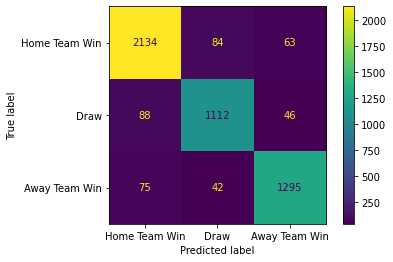

               precision    recall  f1-score   support

Home Team Win       0.92      0.92      0.92      1412
         Draw       0.90      0.89      0.90      1246
Away Team Win       0.93      0.94      0.93      2281

     accuracy                           0.92      4939
    macro avg       0.92      0.92      0.92      4939
 weighted avg       0.92      0.92      0.92      4939


Accuracy:  0.9194168860093136
Recall:  0.9194168860093136
Precision:  0.9193561641815936


----------------------------------------------------------
Predictions for BW


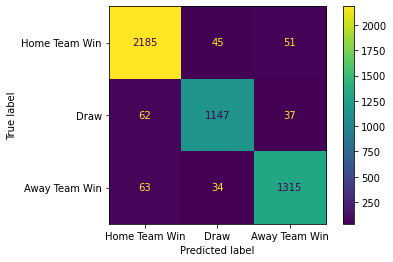

               precision    recall  f1-score   support

Home Team Win       0.94      0.93      0.93      1412
         Draw       0.94      0.92      0.93      1246
Away Team Win       0.95      0.96      0.95      2281

     accuracy                           0.94      4939
    macro avg       0.94      0.94      0.94      4939
 weighted avg       0.94      0.94      0.94      4939


Accuracy:  0.9408787203887427
Recall:  0.9408787203887427
Precision:  0.9408212220193946


----------------------------------------------------------
Predictions for IW


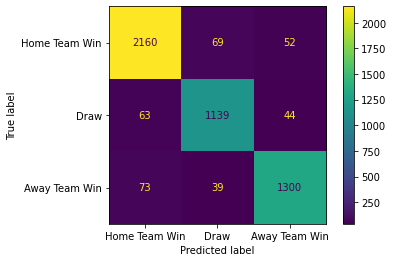

               precision    recall  f1-score   support

Home Team Win       0.93      0.92      0.93      1412
         Draw       0.91      0.91      0.91      1246
Away Team Win       0.94      0.95      0.94      2281

     accuracy                           0.93      4939
    macro avg       0.93      0.93      0.93      4939
 weighted avg       0.93      0.93      0.93      4939


Accuracy:  0.9311601538773031
Recall:  0.9311601538773031
Precision:  0.9311348092869144


----------------------------------------------------------
Predictions for LB


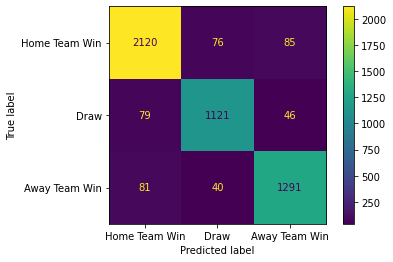

               precision    recall  f1-score   support

Home Team Win       0.91      0.91      0.91      1412
         Draw       0.91      0.90      0.90      1246
Away Team Win       0.93      0.93      0.93      2281

     accuracy                           0.92      4939
    macro avg       0.91      0.91      0.91      4939
 weighted avg       0.92      0.92      0.92      4939


Accuracy:  0.9175946547884187
Recall:  0.9175946547884187
Precision:  0.9175960892670989


----------------------------------------------------------


In [23]:
#Print results
for i in range(len(result_outcomes)):
    print("Predictions for " + clf_title[i])
    prediction_metrics(result_outcomes[i], result_y_predict_decoded[i])